# Анализ поведения пользователей приложения "Ненужные вещи"

**Цель работы**:

Цель данной работы - выявить и описать поведение аудитории приложения "Ненужные вещи" (доска обьявлений по продаже ненужных вещей) для оптимизации привлечения новых и удержания текущих пользователей.


-**Презентация по исследованию**-: https://disk.yandex.ru/i/PuvWj6jPOunVDg

-**Дашборд Tableau по исследованию**-: https://public.tableau.com/app/profile/mikhail.filimonov/viz/Mobile_app_dashboard_16806462723740/Dashboard1

---

**Ход работы**:<a name="0"></a>

Данная работа пройдет в несколько этапов:

1. [**Первичный осмотр данных**](#1)

*Загрузка датасетов, вывод общей информации об исходных данных и детальной информации о столбцах датасетов.*

2. [**Предобработка данных**](#2)

*Обработка пропусков, выбросов, явных и неявных дубликатов на основе выводов из первичного осмотра.*

3. [**Исследовательский анализ данных**](#3)

*Проведение исследовательского анализа данных (EDA), выделения групп пользователей по метрикам:*
- Retention Rate
- Время, проведённое в приложении
- Частота действий
- Конверсия в целевое действие (просмотр контактов).


*По результатам исследовательского анализа провести сегментацию пользователей и ответить на следующие вопросы заказчика:*

 - Пользователи какой группы склонны часто возвращаться в мобильное приложение (Retention rate)?
 - Пользователи какой группы часто делают целевое событие (конверсия в целевое действие)?

4. [**Проверка статистических гипотез**](#4)

*Проверить следующие статистические гипотезы:*

- Проверка гипотезы различия конверсии в просмотры контактов между теми пользователями, которые пришли с источника `yandex` и пользователей, пришедшими из источника `google`. Дополнить её нулевой и альтернативной гипотезами и провести статистический тест.


- Проверка гипотезы различия конверсии в просмотры контактов между теми пользователями, которые добавили обьявление в избранное (действие `favorites_add`) и пользователями, которые не добавляли. Дополнить её нулевой и альтернативной гипотезами и провести статистический тест.

5. [**Общие выводы и рекомендации**](#5)

*Обьединить промежуточные выводы каждого этапа и на их основе сформулировать рекомендации для заказчика.*

---

**Описание данных**:

Датасет содержит данные о событиях, совершенных в мобильном приложении "Ненужные вещи". В нем пользователи продают свои ненужные вещи, размещая их на доске объявлений.

В датасете содержатся данные пользователей, впервые совершивших действия в приложении после 7 октября 2019 года.

Датасет `mobile_dataset.csv` содержит колонки:

- `event.time` — время совершения
- `event.name` — название события
- `user.id` — идентификатор пользователя

Датасет `mobile_sources.csv` содержит колонки:

- `userId` — идентификатор пользователя
- `source` — источник, с которого пользователь установил приложение

Расшифровки событий:

- `advert_open` — открытие карточки объявления
- `photos_show` — просмотр фотографий в объявлении
- `tips_show` — пользователь увидел рекомендованные объявления
- `tips_click` — пользователь кликнул по рекомендованному объявлению
- `contacts_show` и `show_contacts` — пользователь нажал на кнопку "посмотреть номер телефона" на карточке объявления
- `contacts_call` — пользователь позвонил по номеру телефона на карточке объявления
- `map` — пользователь открыл карту размещенных объявлений
- `search_1` — `search_7` — разные события, связанные с поиском по сайту
- `favorites_add` — добавление объявления в избранное

<a name="1"></a>
## Первичный осмотр данных

[*вернуться в оглавление*](#0)

### Загрузка данных

In [81]:
# Импортируем все необходимые библиотеки, которые могут понадобиться в исследовании
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import numpy as np
import math as mth
from scipy import stats as st
import datetime
from datetime import datetime
from datetime import time
from datetime import timedelta
from plotly import graph_objects as go
import plotly.express as px
import json

import os  
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
import math as mth
import warnings

sns.set_theme(style="darkgrid")
pd.options.display.float_format = '{:.2f}'.format

In [2]:
# Загружаем датасеты 
mobile_sources = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_soures.csv')
mobile_dataset = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_dataset.csv')

mobile_sources

userId  source
0     020292ab-89bc-4156-9acf-68bc2783f894   other
1     cf7eda61-9349-469f-ac27-e5b6f5ec475c  yandex
2     8c356c42-3ba9-4cb6-80b8-3f868d0192c3  yandex
3     d9b06b47-0f36-419b-bbb0-3533e582a6cb   other
4     f32e1e2a-3027-4693-b793-b7b3ff274439  google
...                                    ...     ...
4288  b86fe56e-f2de-4f8a-b192-cd89a37ecd41  yandex
4289  424c0ae1-3ea3-4f1e-a814-6bac73e48ab1  yandex
4290  437a4cd4-9ba9-457f-8614-d142bc48fbeb  yandex
4291  c10055f0-0b47-477a-869e-d391b31fdf8f  yandex
4292  d157bffc-264d-4464-8220-1cc0c42f43a9  google

[4293 rows x 2 columns]

In [3]:
mobile_dataset

event.time   event.name  \
0      2019-10-07 00:00:00.431357  advert_open   
1      2019-10-07 00:00:01.236320    tips_show   
2      2019-10-07 00:00:02.245341    tips_show   
3      2019-10-07 00:00:07.039334    tips_show   
4      2019-10-07 00:00:56.319813  advert_open   
...                           ...          ...   
74192  2019-11-03 23:53:29.534986    tips_show   
74193  2019-11-03 23:54:00.407086    tips_show   
74194  2019-11-03 23:56:57.041825     search_1   
74195  2019-11-03 23:57:06.232189    tips_show   
74196  2019-11-03 23:58:12.532487    tips_show   

                                    user.id  
0      020292ab-89bc-4156-9acf-68bc2783f894  
1      020292ab-89bc-4156-9acf-68bc2783f894  
2      cf7eda61-9349-469f-ac27-e5b6f5ec475c  
3      020292ab-89bc-4156-9acf-68bc2783f894  
4      cf7eda61-9349-469f-ac27-e5b6f5ec475c  
...                                     ...  
74192  28fccdf4-7b9e-42f5-bc73-439a265f20e9  
74193  28fccdf4-7b9e-42f5-bc73-439a265f20e9  
74194  20850c8f-4135-4059-b13b-198d3ac59902  
74195  28fccdf4-7b9e-42f5-bc73-439a265f20e9  
74196  28fccdf4-7b9e-42f5-bc73-439a265f20e9  

[74197 rows x 3 columns]

### Общая информация о датасетах

In [4]:
# рассмотрим первый датасет с каналами привлечения
mobile_sources.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB


In [5]:
# оценим количество пропусков и дубликатов
display(mobile_sources.isna().sum())
display(mobile_sources.duplicated().sum())

userId    0
source    0
dtype: int64

0

- Датасет `mobile_sources` содержит два столбца и 4293 строки в формате `object`. Пропусков и явных дубликатов при первичном осмотре не обнаружено.

In [6]:
# рассмотрим второй датасет с хронологией событий пользователей
mobile_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [7]:
# оценим количество пропусков и дубликатов
display(mobile_dataset.isna().sum())
display(mobile_dataset.duplicated().sum())

event.time    0
event.name    0
user.id       0
dtype: int64

0

- Датасет `mobile_dataset` состоит из трех столбцов и 74197 строк в формате `object`. Пропусков и явных дубликатов при первичном осмотре данных не обнаружено.

Для удобства дальнейшей работы с данными приведем названия столбцов к формату 'snake_case':

In [8]:
mobile_dataset.columns =['event_time', 'event_name', 'user_id']
mobile_sources.columns = ['user_id', 'source']

### Информация о столбцах

Начнем изучение столбцов датасетов с датасета `mobile_sources` и столбца `user_id`:

In [9]:
# рассмотрим столбец через describe и первые пять строк 
display(mobile_sources['user_id'].describe())
mobile_sources['user_id'].head()

count                                     4293
unique                                    4293
top       4105dae6-5595-4b9f-bfcf-b742b5830bce
freq                                         1
Name: user_id, dtype: object

0    020292ab-89bc-4156-9acf-68bc2783f894
1    cf7eda61-9349-469f-ac27-e5b6f5ec475c
2    8c356c42-3ba9-4cb6-80b8-3f868d0192c3
3    d9b06b47-0f36-419b-bbb0-3533e582a6cb
4    f32e1e2a-3027-4693-b793-b7b3ff274439
Name: user_id, dtype: object

- Столбец `user_id` датасета `mobile_sources` содержит данные с идентификатором пользователя приложения "Ненужные вещи". Пропусков, явных дубликатов и других аномалий данных при первичном изучении обнаружено не было. Исходя из природы данных, на этапе предобработки можно заменить тип данных столбца с `object` на `string` для оптимизации работы и более точного соответствия.

In [10]:
# рассмотрим столбец через describe и оценим встречающиеся значения
display(mobile_sources['source'].describe())
mobile_sources['source'].value_counts()

count       4293
unique         3
top       yandex
freq        1934
Name: source, dtype: object

yandex    1934
other     1230
google    1129
Name: source, dtype: int64

- Столбец `source` датасета `mobile_sources` содержит данные с источником привлечения конкретного пользователя "Ненужных вещей". Данные представлены в виде трех каналов привлечения: `yandex` является лидером списка, далее идет `other` и замыкает список канал `google`. Пропусков, неявных дубликатов и других аномалий данных при первичном осмотре обнаружено не было. Исходя из природы данных, на этапе обработки можно заменить тип данных столбца с `object` на `category` для оптимизации работы и более точного соответствия.


Далее перейдем к столбцам датасета `mobile_dataset` и начнем обзор с столбца `event_time`:

In [11]:
# рассмотрим столбец через describe и визуально оценим данные
display(mobile_dataset['event_time'].describe())
mobile_dataset['event_time']

count                          74197
unique                         74197
top       2019-10-09 13:16:29.219838
freq                               1
Name: event_time, dtype: object

0        2019-10-07 00:00:00.431357
1        2019-10-07 00:00:01.236320
2        2019-10-07 00:00:02.245341
3        2019-10-07 00:00:07.039334
4        2019-10-07 00:00:56.319813
                    ...            
74192    2019-11-03 23:53:29.534986
74193    2019-11-03 23:54:00.407086
74194    2019-11-03 23:56:57.041825
74195    2019-11-03 23:57:06.232189
74196    2019-11-03 23:58:12.532487
Name: event_time, Length: 74197, dtype: object

- Столбец `event_time` датасета `mobile_dataset` содержит данные о времени совершения события пользователем приложения. Данные представляют собой дату и время до миллионной доли секунды. Пропусков, дубликатов и других аномалий данных при первичном осмотре обнаружено не было. Исходя из природы данных, на этапе предобработки можно заменить тип данных с `object` на `datetime` для более точного соответствия природе данных. Стоит учесть, что такая смена формата повлечет за собой видоизменение данных: так как данные будут округлены до секунд, в столбце появятся повторения, которые можно некорректно принять за дубликаты.

In [12]:
# рассмотрим столбец через describe и оценим встречающиеся значения
display(mobile_dataset['event_name'].describe())
mobile_dataset['event_name'].value_counts()

count         74197
unique           16
top       tips_show
freq          40055
Name: event_name, dtype: object

tips_show        40055
photos_show      10012
advert_open       6164
contacts_show     4450
map               3881
search_1          3506
favorites_add     1417
search_5          1049
tips_click         814
search_4           701
contacts_call      541
search_3           522
search_6           460
search_2           324
search_7           222
show_contacts       79
Name: event_name, dtype: int64

- Столбец `event_name` датасета `mobile_dataset` содержит данные о названии события, совершенного пользователем в приложении за наблюдаемый период. Данные представлены в виде 16 наименований: в лидерах списка расположены `tips_show`, `photos_show` и `advert_open`, а замыкают список `search_2`, `search_7` и `show_contacts`. В столбце обнаружены неявные дубликаты: `contacts_show` и `show_contacts` - это дублирование одного действия (показ контактов); `search_1` — `search_7` - за отсутствием явных различий между разными поисками по сайту, все поиски можно считать за одно действие. Данные категорий можно обьединить, что сократит количество наименований с 16 до 9. Пропусков и других аномалий данных при первичном осмотре обнаружено не было. Исходя из наблюдений выше и природы самих данных, на этапе предобработки можно обьединить `contacts_show` и `show_contacts`, как и `search_1` — `search_7`, а также заменить тип данных с `object` на `category` для оптимизации работы.

In [13]:
# рассмотрим столбец через describe и оценим встречающиеся значения
display(mobile_dataset['user_id'].describe())
mobile_dataset['user_id'].value_counts()

count                                    74197
unique                                    4293
top       cb36854f-570a-41f4-baa8-36680b396370
freq                                       478
Name: user_id, dtype: object

cb36854f-570a-41f4-baa8-36680b396370    478
e13f9f32-7ae3-4204-8d60-898db040bcfc    465
9ce63488-758a-481a-bcb5-a02b467e1d84    407
21230dd9-2f7f-4b77-a436-43d4d10388e0    400
be1449f6-ca45-4f94-93a7-ea4b079b8f0f    397
                                       ... 
43d96be4-1702-4b2d-8c92-38e8805b1521      1
8f3f53e2-4711-44ed-aefd-65ab62fb0921      1
7a084a49-7fea-4ebe-a09e-35d4da980cd0      1
61d27241-64d3-4af0-9671-253aea8c90ed      1
3d8ccc14-61dd-477f-a9ec-f50ac3f8f15a      1
Name: user_id, Length: 4293, dtype: int64

- Столбец `user_id` датасета `mobile_dataset` содержит данные с идентификатором пользователя приложения "Ненужные вещи", соответствующим совершенным действиям. Данные столбца содержат схожие данные с стобцом `user_id` датасета `mobile_sources`, что можно использовать для обьединения датасетов в один. Пропусков, явных дубликатов и других аномалий данных при первичном изучении обнаружено не было. Исходя из природы данных, на этапе предобработки можно заменить тип данных столбца с `object` на `string` для оптимизации работы и более точного соответствия.

### Выводы - Первичный осмотр данных

---

**Датасет `mobile_sources`**:


- Датасет `mobile_sources` содержит два столбца и 4293 строки в формате `object`. Данные датасета связывают между собой уникальные идентификаторы пользователей приложения и рекламные каналы, с которых они были привлечены.


- Столбец `user_id` датасета `mobile_sources` содержит данные с идентификатором пользователя приложения "Ненужные вещи". Пропусков, явных дубликатов и других аномалий данных при первичном изучении обнаружено не было. 

 - Исходя из природы данных, на этапе предобработки можно заменить тип данных столбца с `object` на `string` для оптимизации работы и более точного соответствия.


- Столбец `source` датасета `mobile_sources` содержит данные с источником привлечения конкретного пользователя "Ненужных вещей". Данные представлены в виде трех каналов привлечения: `yandex` является лидером списка, далее идет `other` и замыкает список канал `google`. Пропусков, неявных дубликатов и других аномалий данных при первичном осмотре обнаружено не было. 

 - Исходя из природы данных, на этапе обработки можно заменить тип данных столбца с `object` на `category` для оптимизации работы и более точного соответствия.


---


**Датасет `mobile_dataset`**:


- Датасет `mobile_dataset` состоит из трех столбцов и 74197 строк в формате `object`. Данные датасета связывают между собой уникальные идентификаторы пользователей, совершенные ими действия в приложении и дату-время совершения действий.


- Столбец `event_time` датасета `mobile_dataset` содержит данные о времени совершения события пользователем приложения. Данные представляют собой дату и время до миллионной доли секунды. Пропусков, дубликатов и других аномалий данных при первичном осмотре обнаружено не было. 

 - Исходя из природы данных, на этапе предобработки можно заменить тип данных с `object` на `datetime` для более точного соответствия природе данных. Стоит учесть, что такая смена формата повлечет за собой видоизменение данных: так как данные будут округлены до секунд, в столбце появятся повторения, которые можно некорректно принять за дубликаты.


- Столбец `event_name` датасета `mobile_dataset` содержит данные о названии события, совершенного пользователем в приложении за наблюдаемый период. Данные представлены в виде 16 наименований: в лидерах списка расположены `tips_show`, `photos_show` и `advert_open`, а замыкают список `search_2`, `search_7` и `show_contacts`. В столбце обнаружены неявные дубликаты: `contacts_show` и `show_contacts` - это дублирование одного действия (показ контактов); `search_1` — `search_7` - за отсутствием явных различий между разными поисками по сайту, все поиски можно считать за одно действие. Данные категорий можно обьединить, что сократит количество наименований с 16 до 9. Пропусков и других аномалий данных при первичном осмотре обнаружено не было. 

 - Исходя из наблюдений выше и природы самих данных, на этапе предобработки можно обьединить `contacts_show` и `show_contacts`, как и `search_1` — `search_7`, а также заменить тип данных с `object` на `category` для оптимизации работы.


- Столбец `user_id` датасета `mobile_dataset` содержит данные с идентификатором пользователя приложения "Ненужные вещи", соответствующим совершенным действиям. Данные столбца содержат схожие данные с стобцом `user_id` датасета `mobile_sources`, что можно использовать для обьединения датасетов в один. Пропусков, явных дубликатов и других аномалий данных при первичном изучении обнаружено не было. 

 - Исходя из природы данных, на этапе предобработки можно заменить тип данных столбца с `object` на `string` для оптимизации работы и более точного соответствия.


---

<a name="2"></a>
## Предобработка данных

[*вернуться в оглавление*](#0)

### Обработка пропусков, дубликатов и аномалий данных

На основе выводов и наблюдений из этапа первичного осмотра обработаем данные датасетов:

In [14]:
# обьединим датасеты по идентификаторам пользователей
df = mobile_dataset.merge(mobile_sources, on='user_id', how='left')

# сделаем копию исходных данных для сравнения
df_raw = df.copy()

# выведем оба датасета на экран
display(df.head())
df_raw.head()

event_time   event_name  \
0  2019-10-07 00:00:00.431357  advert_open   
1  2019-10-07 00:00:01.236320    tips_show   
2  2019-10-07 00:00:02.245341    tips_show   
3  2019-10-07 00:00:07.039334    tips_show   
4  2019-10-07 00:00:56.319813  advert_open   

                                user_id  source  
0  020292ab-89bc-4156-9acf-68bc2783f894   other  
1  020292ab-89bc-4156-9acf-68bc2783f894   other  
2  cf7eda61-9349-469f-ac27-e5b6f5ec475c  yandex  
3  020292ab-89bc-4156-9acf-68bc2783f894   other  
4  cf7eda61-9349-469f-ac27-e5b6f5ec475c  yandex

event_time   event_name  \
0  2019-10-07 00:00:00.431357  advert_open   
1  2019-10-07 00:00:01.236320    tips_show   
2  2019-10-07 00:00:02.245341    tips_show   
3  2019-10-07 00:00:07.039334    tips_show   
4  2019-10-07 00:00:56.319813  advert_open   

                                user_id  source  
0  020292ab-89bc-4156-9acf-68bc2783f894   other  
1  020292ab-89bc-4156-9acf-68bc2783f894   other  
2  cf7eda61-9349-469f-ac27-e5b6f5ec475c  yandex  
3  020292ab-89bc-4156-9acf-68bc2783f894   other  
4  cf7eda61-9349-469f-ac27-e5b6f5ec475c  yandex

In [15]:
# оценим количество пропусков и дубликатов после обьединения датасетов
display(df.isna().sum())
display(df.duplicated().sum())

event_time    0
event_name    0
user_id       0
source        0
dtype: int64

0

Начнем обработку с замены типов данных столбцов `user_id` и `source`, так как для них это единственные изменения на данный момент:

In [16]:
# заменим типы данных на основе выводов прошлого этапа
df['user_id'] = df['user_id'].astype('string')
df['source'] = df['source'].astype('category')

# выведем изменения на экран
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74197 entries, 0 to 74196
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   event_time  74197 non-null  object  
 1   event_name  74197 non-null  object  
 2   user_id     74197 non-null  string  
 3   source      74197 non-null  category
dtypes: category(1), object(2), string(1)
memory usage: 2.3+ MB


Далее обьединим неявные дубликаты столбца `event_name` через следующую функцию:

In [17]:
# обьявим функцию для замены названий
def replace_name(name):
    """ Простая функция для замены названий:
    для всех нумерованных `search` убираем номер,
    для `show_contacts` - меняем местами слова.
    """
    if 'search_' in name:
        return 'search'
    elif 'show_' in name:
        return 'contacts_show'
    else: 
        return name

In [18]:
# выведем исходные значения
display(df['event_name'].value_counts())

tips_show        40055
photos_show      10012
advert_open       6164
contacts_show     4450
map               3881
search_1          3506
favorites_add     1417
search_5          1049
tips_click         814
search_4           701
contacts_call      541
search_3           522
search_6           460
search_2           324
search_7           222
show_contacts       79
Name: event_name, dtype: int64

In [19]:
# применим функцию к столбцу и выведем результат на экран
df['event_name']=df['event_name'].apply(replace_name)
display(df['event_name'].value_counts())

# изменим тип данных и перейдем дальше
# df['event_name'] = df['event_name'].astype('category')

tips_show        40055
photos_show      10012
search            6784
advert_open       6164
contacts_show     4529
map               3881
favorites_add     1417
tips_click         814
contacts_call      541
Name: event_name, dtype: int64

Далее изменим тип данных столбца `event_time` и выделим отдельный столбец с датами для расчета lifetime/сессий пользователей и других показателей:

In [20]:
# изменим тип для данных даты-времени
df['event_time'] = pd.to_datetime(df['event_time'], format='%Y-%m-%d %H:%M:%S')
df['event_time'] = df['event_time'].dt.strftime("%Y-%m-%d %H:%M:%S")
df['event_time'] = pd.to_datetime(df['event_time'], format='%Y-%m-%d %H:%M:%S')

# # выделим отдельный столбец для дат
df['event_date'] = pd.to_datetime(df['event_time'], format='%Y-%m-%d')
df['event_date'] = df['event_date'].dt.strftime("%Y-%m-%d")
df['event_date'] = pd.to_datetime(df['event_date'], format='%Y-%m-%d')

# выведем результат на экран
df.head()

event_time   event_name                               user_id  \
0 2019-10-07 00:00:00  advert_open  020292ab-89bc-4156-9acf-68bc2783f894   
1 2019-10-07 00:00:01    tips_show  020292ab-89bc-4156-9acf-68bc2783f894   
2 2019-10-07 00:00:02    tips_show  cf7eda61-9349-469f-ac27-e5b6f5ec475c   
3 2019-10-07 00:00:07    tips_show  020292ab-89bc-4156-9acf-68bc2783f894   
4 2019-10-07 00:00:56  advert_open  cf7eda61-9349-469f-ac27-e5b6f5ec475c   

   source event_date  
0   other 2019-10-07  
1   other 2019-10-07  
2  yandex 2019-10-07  
3   other 2019-10-07  
4  yandex 2019-10-07

Проверим измененный датасет `df` на появление аномалий после предобработки данных:

In [21]:
# оценим количество пропусков и дубликатов
display(df.isna().sum())
display(df.duplicated().sum())

event_time    0
event_name    0
user_id       0
source        0
event_date    0
dtype: int64

1224

В датасете появилось 1224 явных дубликата, что не наблюдалось в исходных данных. Рассмотрим дубликаты отдельно:

In [22]:
# рассмотрим, есть ли взаимосвязь дубликатов и данных столбцов
display(df[df.duplicated()].head())

display(df[df.duplicated()]['user_id'].value_counts().head())
display(df[df.duplicated()]['source'].value_counts())
display(df[df.duplicated()]['event_name'].value_counts())
display(df[df.duplicated()]['event_time'].value_counts().head())
# display(df[df.duplicated()]['date'].value_counts().head())

event_time event_name                               user_id  \
396 2019-10-07 11:00:20  tips_show  fb667205-a708-4693-832d-363a30022cfc   
422 2019-10-07 11:10:39        map  ed13f6f0-08f4-4561-852e-456580f7a40d   
424 2019-10-07 11:10:40        map  ed13f6f0-08f4-4561-852e-456580f7a40d   
425 2019-10-07 11:10:40        map  ed13f6f0-08f4-4561-852e-456580f7a40d   
430 2019-10-07 11:11:32        map  ed13f6f0-08f4-4561-852e-456580f7a40d   

     source event_date  
396  yandex 2019-10-07  
422  yandex 2019-10-07  
424  yandex 2019-10-07  
425  yandex 2019-10-07  
430  yandex 2019-10-07

9c78948d-5850-4916-9d7f-341fec1b7737    65
62a5375a-eb94-4ed2-90ef-3d79d8e0c359    55
13140930-df18-4793-a230-7cca5c8813db    54
9b835c74-8ede-4586-9f59-e5473aa48de2    31
b3de93e2-1b08-4b1e-9fc9-44bb0eb05999    27
Name: user_id, dtype: Int64

yandex    467
other     447
google    310
Name: source, dtype: int64

photos_show      660
contacts_show    153
tips_show        148
map              132
search           100
advert_open       18
contacts_call      7
tips_click         3
favorites_add      3
Name: event_name, dtype: int64

2019-10-27 20:00:06    8
2019-10-31 01:15:46    7
2019-10-17 23:45:01    6
2019-10-26 09:02:53    6
2019-10-23 18:16:13    6
Name: event_time, dtype: int64

- Вероятнее всего, что причиной обнаружения дубликатов является округление данных столбца `event_time` с миллионных долей секунды до целой секунды как минимальной единицы. Физически маловероятно, что пользователи самостоятельно совершали действия на таких высоких скоростях - так что саму исходную причину возникновения дубликатов можно списать на технические ошибки записи исходных данных со стороны UI или back-end самого приложения, когда одно и тоже действие пользователя записывается в базу данных несколько раз.

In [23]:
# посчитаем долю дубликатов от общего числа строк

i = round((df.duplicated().sum()/len(df)) * 100, 2)

print(f'Процент дубликатов от общего числа строк - {i}%')

Процент дубликатов от общего числа строк - 1.65%


### Выделение сессий пользователей и времени между событиями

Начнем с определения границ временного промежутка данных:

In [24]:
print('- Самая ранняя дата наблюдений =', df['event_time'].min())
print()
print('- Самая поздняя дата наблюдений =', df['event_time'].max())
print()
print('- Рассматриваемый временной период =', (df['event_time'].max() - df['event_time'].min()))

- Самая ранняя дата наблюдений = 2019-10-07 00:00:00

- Самая поздняя дата наблюдений = 2019-11-03 23:58:12

- Рассматриваемый временной период = 27 days 23:58:12


Далее необходимо определить и выделить сессии индивидуальных пользователей. На основе имеющихся данных это можно сделать двумя способами:

1. Выделить в сессию все, что происходит в один календарный день. 


Преимуществом данного метода является сравнительная простота имплементации и меньшее влияние на результаты менее активных пользователей. Недостатком данного метода является то, что возможные несколько сессий пользователя в один день будут считаться за одну, тогда как сессии в переходе между установленными границами двух календарных дней будут считаться за дубль. Таким образом, количество сессий среди пользователей и среди дат будет занижено самой природой расчетов.


2. Выделить в сессию серию событий, где перерыв в активности между ними составляет не более заранее заданного промежутка (15-20-30-40 минут и т.п.). 


Преимуществом является большая точность по количеству сессий индивидуальных пользователей в один календарный день, чем у предыдущего метода. Недостатком является заведомо ручной выбор промежутка тайм-аута, что может исключить регистрирование сессии у пользователей, не подходящих под определение. Также количество сессий среди пользователей и среди дат будет уже завышено самой природой расчетов, по сравнению с предыдущим методом и предположительным средним числом сессий среди пользователей - что может выявиться в виде выбросов и аномалий данных.


Для определения наиболее точного в текущих условиях метода, применим оба и сравним результаты:

In [25]:
# выделим сессии по календарным дням

# сортируем датасет по пользовательскому времени
df = df.sort_values(by=['user_id','event_time'])
# группируем пользователей по датам с накопленной суммой
g = (df.groupby('user_id')['event_time'].diff()).cumsum()
# создаем счетчик групп
date_session_id = df.groupby(['user_id', g], sort=False).ngroup() + 2
# рассчитаем среднее количество сессий и среднее количество действий в сессии на пользователя
avg_session_per_user = round(date_session_id.nunique()/len(mobile_sources), 2)
avg_actions_per_session = round(len(df)/date_session_id.nunique(), 2)

print('---'*10)
print()
print(f'- Количество уникальных сессий пользователей (календарный день): {date_session_id.nunique()}')
print()
print(f'- Cреднее количество сессий на пользователя (календарный день): {avg_session_per_user}')
print()
print(f'- Cреднее число событий в сессий (календарный день): {avg_actions_per_session}')
print()
df.head(15)

------------------------------

- Количество уникальных сессий пользователей (календарный день): 68678

- Cреднее количество сессий на пользователя (календарный день): 16.0

- Cреднее число событий в сессий (календарный день): 1.08



event_time event_name                               user_id  \
805   2019-10-07 13:39:45  tips_show  0001b1d5-b74a-4cbf-aeb0-7df5947bf349   
806   2019-10-07 13:40:31  tips_show  0001b1d5-b74a-4cbf-aeb0-7df5947bf349   
809   2019-10-07 13:41:05  tips_show  0001b1d5-b74a-4cbf-aeb0-7df5947bf349   
820   2019-10-07 13:43:20  tips_show  0001b1d5-b74a-4cbf-aeb0-7df5947bf349   
830   2019-10-07 13:45:30  tips_show  0001b1d5-b74a-4cbf-aeb0-7df5947bf349   
831   2019-10-07 13:45:43  tips_show  0001b1d5-b74a-4cbf-aeb0-7df5947bf349   
832   2019-10-07 13:46:31  tips_show  0001b1d5-b74a-4cbf-aeb0-7df5947bf349   
836   2019-10-07 13:47:32  tips_show  0001b1d5-b74a-4cbf-aeb0-7df5947bf349   
839   2019-10-07 13:49:41  tips_show  0001b1d5-b74a-4cbf-aeb0-7df5947bf349   
6541  2019-10-09 18:33:55        map  0001b1d5-b74a-4cbf-aeb0-7df5947bf349   
6546  2019-10-09 18:35:28        map  0001b1d5-b74a-4cbf-aeb0-7df5947bf349   
6565  2019-10-09 18:40:28  tips_show  0001b1d5-b74a-4cbf-aeb0-7df5947bf349   
6566  2019-10-09 18:42:22  tips_show  0001b1d5-b74a-4cbf-aeb0-7df5947bf349   
36412 2019-10-21 19:52:30  tips_show  0001b1d5-b74a-4cbf-aeb0-7df5947bf349   
36416 2019-10-21 19:53:17  tips_show  0001b1d5-b74a-4cbf-aeb0-7df5947bf349   

      source event_date  
805    other 2019-10-07  
806    other 2019-10-07  
809    other 2019-10-07  
820    other 2019-10-07  
830    other 2019-10-07  
831    other 2019-10-07  
832    other 2019-10-07  
836    other 2019-10-07  
839    other 2019-10-07  
6541   other 2019-10-09  
6546   other 2019-10-09  
6565   other 2019-10-09  
6566   other 2019-10-09  
36412  other 2019-10-21  
36416  other 2019-10-21

Так как нам неизвестен средний период между сессиями пользователей, обьявим функцию для вывода результата и пройдемся ей по списку с интервалами. 
Сами интервалы были выбраны следующим образом:
- 1440 минут - количество минут в сутках (24 часа);
- 848 минут - интервал перерыва (примерно 14 часов), количество сессий в котором равно количеству сессий при выделении по календарным дням;
- 60 - 5 минут - интервал перерыва от одного часа до пяти минут с шагом в пять минут.

In [26]:
def timeout_session(df, interval):
    """ Функция для вывода количества сессий
    пользователей на основе интервала перерыва между ними.
    
    """
    # отсортируем датасет по пользовательскому времени для перестраховки
    df = df.sort_values(by=['user_id','event_time'])
    # определим разницу минут для каждой группы с накопленной суммой
    g = (df.groupby('user_id')['event_time'].diff() > pd.Timedelta(interval)).cumsum()
    # создаем счетчик групп
    timeout_session_id = df.groupby(['user_id', g], sort=False).ngroup() + 1
    # рассчитаем среднее количество сессий и среднее количество действий в сессии на пользователя
    avg_session_per_user = round(timeout_session_id.nunique()/len(mobile_sources), 2)
    avg_actions_per_session = round(len(df)/timeout_session_id.nunique(), 2)


    print('---'*10)
    print()
    print(f'- Количество уникальных сессий пользователей (таймаут - {interval}): {timeout_session_id.nunique()}')
    print(f'- Cреднее количество сессий на пользователя (таймаут - {interval}): {avg_session_per_user}')
    print(f'- Cреднее число событий в сессий (таймаут - {interval}): {avg_actions_per_session}')

In [27]:
# сохраним интервалы в списке
intervals = ['1440min', 
             '848min', 
             '60min', '55min', '50min', '45min', '40min', '35min', '30min', '25min', '20min', '15min', '10min', '5min'
            ]

# пройдем 
for i in intervals:
    timeout_session(df, i)
    print()

------------------------------

- Количество уникальных сессий пользователей (таймаут - 1440min): 6564
- Cреднее количество сессий на пользователя (таймаут - 1440min): 1.53
- Cреднее число событий в сессий (таймаут - 1440min): 11.3

------------------------------

- Количество уникальных сессий пользователей (таймаут - 848min): 7522
- Cреднее количество сессий на пользователя (таймаут - 848min): 1.75
- Cреднее число событий в сессий (таймаут - 848min): 9.86

------------------------------

- Количество уникальных сессий пользователей (таймаут - 60min): 9573
- Cреднее количество сессий на пользователя (таймаут - 60min): 2.23
- Cреднее число событий в сессий (таймаут - 60min): 7.75

------------------------------

- Количество уникальных сессий пользователей (таймаут - 55min): 9665
- Cреднее количество сессий на пользователя (таймаут - 55min): 2.25
- Cреднее число событий в сессий (таймаут - 55min): 7.68

------------------------------

- Количество уникальных сессий пользователей (тайма

Сравнивая результаты применения двух методов, можно вынести следующие выводы:

- Выделение сессий пользователей по календарной дате событий показывает самое низкое количество сессий из данных датасета: 7522 сессии, 1.75 сессий на пользователя и 9.86 событий в сессии в среднем - аналогичные результаты выходят при выделении сессий пользователей по периоду неактивности между событиями в 848 минут. Данные две отметки вполне подходят на роль максимального актуального периода неактивности. Результаты выделения сессий по тайм-ауту в 1440 минут (24 часа) были добавлены для сравнения изменения соотношения показателей.


- Выделение сессий пользователей по минимальным интервалам перерыва между действиями (5 и 10 минут) было также добавлено для сравнения изменений соотношения показателей и принимать данные значения интервалов за подходящие для исследования не рекомендуется, так как оба интервала перерыва не превышают [среднего показателя времени посещения для аналогичных онлайн-площадок](https://www.similarweb.com/top-websites/e-commerce-and-shopping/classifieds/). Этот факт не исключает возможной актуальности данных интервалов (все таки время посещения и время перерыва между посещениями - это разные показатели), но заставляет сомневаться слишком большая разница показателей интервалов для сравнительно малого количества минут - в среднем показатели таймаута в 10 минут меньше на 25% показателей в 5 минут.


- Если сравнивать показатели перерывов между собой и взять как желаемую метрику минимальное изменение параметров между перерывами, то показатели перерыва в 20 минут представляются наиболее подходящими для дальнейшего исследования: количество уникальных сессий пользователей - 10975, среднее количество сессий на пользователя - 2.56, среднее число событий в сессий - 6.76. Показатели больших перерывов не так сильно отличаются (25+ минут), тогда как показатели меньших перерывов (15 минут и меньше) показывают большую разницу. Вполне логично предположить, что большинство сессий укладываются в диапазоне 20-60 минут и отметку в 20 минут для интервала перерыва можно считать за минимальный актуальный период неактивности.


Добавим столбец с сессиями, выделенными через интервал перерыва в 20 минут, и перейдем дальше:

In [28]:
# определим разницу минут для каждой группы с накопленной суммой
g = (df.groupby('user_id')['event_time'].diff() > pd.Timedelta('20min')).cumsum()
# создаем счетчик групп
df['timeout_session_id'] = df.groupby(['user_id', g], sort=False).ngroup() + 1
df

event_time     event_name  \
805   2019-10-07 13:39:45      tips_show   
806   2019-10-07 13:40:31      tips_show   
809   2019-10-07 13:41:05      tips_show   
820   2019-10-07 13:43:20      tips_show   
830   2019-10-07 13:45:30      tips_show   
...                   ...            ...   
72584 2019-11-03 15:51:23      tips_show   
72589 2019-11-03 15:51:57  contacts_show   
72684 2019-11-03 16:07:40      tips_show   
72688 2019-11-03 16:08:18      tips_show   
72689 2019-11-03 16:08:25      tips_show   

                                    user_id  source event_date  \
805    0001b1d5-b74a-4cbf-aeb0-7df5947bf349   other 2019-10-07   
806    0001b1d5-b74a-4cbf-aeb0-7df5947bf349   other 2019-10-07   
809    0001b1d5-b74a-4cbf-aeb0-7df5947bf349   other 2019-10-07   
820    0001b1d5-b74a-4cbf-aeb0-7df5947bf349   other 2019-10-07   
830    0001b1d5-b74a-4cbf-aeb0-7df5947bf349   other 2019-10-07   
...                                     ...     ...        ...   
72584  fffb9e79-b927-4dbb-9b48-7fd09b23a62b  google 2019-11-03   
72589  fffb9e79-b927-4dbb-9b48-7fd09b23a62b  google 2019-11-03   
72684  fffb9e79-b927-4dbb-9b48-7fd09b23a62b  google 2019-11-03   
72688  fffb9e79-b927-4dbb-9b48-7fd09b23a62b  google 2019-11-03   
72689  fffb9e79-b927-4dbb-9b48-7fd09b23a62b  google 2019-11-03   

       timeout_session_id  
805                     1  
806                     1  
809                     1  
820                     1  
830                     1  
...                   ...  
72584               10975  
72589               10975  
72684               10975  
72688               10975  
72689               10975  

[74197 rows x 6 columns]

In [29]:
df['timeout_session_id'] = df['timeout_session_id'].astype('int32')

Далее добавим время начала и окончания сессий:

In [30]:
# Создаем таблицу с началом и окончанием каждой сессии
session_frame = df.groupby('timeout_session_id')['event_time'].agg(['first', 'last'])
# Заменим названия столбцов
session_frame = session_frame.rename(columns={'first': 'session_start', 'last': 'session_end'})
# Соединим с исходным датасетом по идентификатору сессий
df = df.merge(session_frame, how='inner', on='timeout_session_id')

df.head(20)

event_time event_name                               user_id  \
0  2019-10-07 13:39:45  tips_show  0001b1d5-b74a-4cbf-aeb0-7df5947bf349   
1  2019-10-07 13:40:31  tips_show  0001b1d5-b74a-4cbf-aeb0-7df5947bf349   
2  2019-10-07 13:41:05  tips_show  0001b1d5-b74a-4cbf-aeb0-7df5947bf349   
3  2019-10-07 13:43:20  tips_show  0001b1d5-b74a-4cbf-aeb0-7df5947bf349   
4  2019-10-07 13:45:30  tips_show  0001b1d5-b74a-4cbf-aeb0-7df5947bf349   
5  2019-10-07 13:45:43  tips_show  0001b1d5-b74a-4cbf-aeb0-7df5947bf349   
6  2019-10-07 13:46:31  tips_show  0001b1d5-b74a-4cbf-aeb0-7df5947bf349   
7  2019-10-07 13:47:32  tips_show  0001b1d5-b74a-4cbf-aeb0-7df5947bf349   
8  2019-10-07 13:49:41  tips_show  0001b1d5-b74a-4cbf-aeb0-7df5947bf349   
9  2019-10-09 18:33:55        map  0001b1d5-b74a-4cbf-aeb0-7df5947bf349   
10 2019-10-09 18:35:28        map  0001b1d5-b74a-4cbf-aeb0-7df5947bf349   
11 2019-10-09 18:40:28  tips_show  0001b1d5-b74a-4cbf-aeb0-7df5947bf349   
12 2019-10-09 18:42:22  tips_show  0001b1d5-b74a-4cbf-aeb0-7df5947bf349   
13 2019-10-21 19:52:30  tips_show  0001b1d5-b74a-4cbf-aeb0-7df5947bf349   
14 2019-10-21 19:53:17  tips_show  0001b1d5-b74a-4cbf-aeb0-7df5947bf349   
15 2019-10-21 19:53:38        map  0001b1d5-b74a-4cbf-aeb0-7df5947bf349   
16 2019-10-21 19:54:45  tips_show  0001b1d5-b74a-4cbf-aeb0-7df5947bf349   
17 2019-10-21 19:54:56  tips_show  0001b1d5-b74a-4cbf-aeb0-7df5947bf349   
18 2019-10-21 19:56:49        map  0001b1d5-b74a-4cbf-aeb0-7df5947bf349   
19 2019-10-21 19:57:21  tips_show  0001b1d5-b74a-4cbf-aeb0-7df5947bf349   

   source event_date  timeout_session_id       session_start  \
0   other 2019-10-07                   1 2019-10-07 13:39:45   
1   other 2019-10-07                   1 2019-10-07 13:39:45   
2   other 2019-10-07                   1 2019-10-07 13:39:45   
3   other 2019-10-07                   1 2019-10-07 13:39:45   
4   other 2019-10-07                   1 2019-10-07 13:39:45   
5   other 2019-10-07                   1 2019-10-07 13:39:45   
6   other 2019-10-07                   1 2019-10-07 13:39:45   
7   other 2019-10-07                   1 2019-10-07 13:39:45   
8   other 2019-10-07                   1 2019-10-07 13:39:45   
9   other 2019-10-09                   2 2019-10-09 18:33:55   
10  other 2019-10-09                   2 2019-10-09 18:33:55   
11  other 2019-10-09                   2 2019-10-09 18:33:55   
12  other 2019-10-09                   2 2019-10-09 18:33:55   
13  other 2019-10-21                   3 2019-10-21 19:52:30   
14  other 2019-10-21                   3 2019-10-21 19:52:30   
15  other 2019-10-21                   3 2019-10-21 19:52:30   
16  other 2019-10-21                   3 2019-10-21 19:52:30   
17  other 2019-10-21                   3 2019-10-21 19:52:30   
18  other 2019-10-21                   3 2019-10-21 19:52:30   
19  other 2019-10-21                   3 2019-10-21 19:52:30   

           session_end  
0  2019-10-07 13:49:41  
1  2019-10-07 13:49:41  
2  2019-10-07 13:49:41  
3  2019-10-07 13:49:41  
4  2019-10-07 13:49:41  
5  2019-10-07 13:49:41  
6  2019-10-07 13:49:41  
7  2019-10-07 13:49:41  
8  2019-10-07 13:49:41  
9  2019-10-09 18:42:22  
10 2019-10-09 18:42:22  
11 2019-10-09 18:42:22  
12 2019-10-09 18:42:22  
13 2019-10-21 20:07:30  
14 2019-10-21 20:07:30  
15 2019-10-21 20:07:30  
16 2019-10-21 20:07:30  
17 2019-10-21 20:07:30  
18 2019-10-21 20:07:30  
19 2019-10-21 20:07:30

In [31]:
# выведем датасеты на экран
display(df_raw.info())
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74197 entries, 0 to 74196
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event_time  74197 non-null  object
 1   event_name  74197 non-null  object
 2   user_id     74197 non-null  object
 3   source      74197 non-null  object
dtypes: object(4)
memory usage: 2.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74197 entries, 0 to 74196
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   event_time          74197 non-null  datetime64[ns]
 1   event_name          74197 non-null  object        
 2   user_id             74197 non-null  string        
 3   source              74197 non-null  category      
 4   event_date          74197 non-null  datetime64[ns]
 5   timeout_session_id  74197 non-null  int32         
 6   session_start       74197 non-null  datetime64[ns]
 7   session_end         74197 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](4), int32(1), object(1), string(1)
memory usage: 4.3+ MB


### Выводы - Предобработка данных

- Через предобработку данных (обьединение исходных датасетов, изменение типов данных) датасет `df` был подготовлен к дальнейшему исследованию через добавление новых столбцов на основе имеющихся данных (8 против 4 у исходного датасета). Добавили столбец `date` с датой события; `timeout_session_id` с номером уникальной сессии на основе перерыва между событиями более 20 минут; `previous_event_time` и `previous_event_name` содержат данные о времени совершения и названии предыдущего события пользователя, а столбец `time_bw_events` - разницу во времени между предыдущим и текущим событием.


- В датасете появилось 1224 явных дубликата, что не наблюдалось в исходных данных. Процент дубликатов от общего числа строк - 1.65%. Вероятнее всего, что причиной обнаружения дубликатов является округление данных столбца `event_time` с миллионных долей секунды до целой секунды как минимальной единицы. Физически маловероятно, что пользователи самостоятельно совершали действия на таких высоких скоростях - так что саму исходную причину возникновения дубликатов можно списать на технические ошибки записи исходных данных со стороны UI или back-end самого приложения, когда одно и тоже действие пользователя записывается в базу данных несколько раз (мультиклик). Так как не было обнаружено диспропорционального сдвига в данных после осмотра дубликатов, а их количество не является статистически значимым для дальнейшего исследования, принято решение оставить данные как есть.


- Если сравнивать показатели перерывов между собой и взять как желаемую метрику минимальное изменение параметров между перерывами, то показатели перерыва в 20 минут представляются наиболее подходящими для дальнейшего исследования: количество уникальных сессий пользователей - 10975, среднее количество сессий на пользователя - 2.56, среднее число событий в сессий - 6.76. Показатели больших перерывов не так сильно отличаются (25+ минут), тогда как показатели меньших перерывов (15 минут и меньше) показывают большую разницу. Вполне логично предположить, что большинство сессий укладываются в диапазоне 20-60 минут и отметку в 20 минут для интервала перерыва можно считать за минимальный актуальный период неактивности.

<a name="3"></a>
## Исследовательский анализ данных

[*вернуться в оглавление*](#0)

В рамках исследовательского анализа данных проведем выделения групп пользователей по следующим метрикам:*
- Retention Rate
- Время, проведённое в приложении
- Частота действий
- Конверсия в целевое действие (просмотр контактов).

А также ответим на поставленные вопросы в разрезе сегментированных групп:

- Пользователи какой группы склонны часто возвращаться в мобильное приложение (Retention rate)?

- Пользователи какой группы часто делают целевое событие (конверсия в целевое действие)?

- Как различается время между распространенными событиями пользователей из разных групп

За основу разделения пользователей на сегменты возьмем данные о рекламных каналах привлечения пользователей: `yandex`, `google` и `other`.

### Удержание пользователей (Retention Rate)

Начнем анализ удержания пользователей с расчета первых сессий и лайфтайма:

In [32]:
# выделяем первый заход в приложения для пользователей 
result_raw = df.pivot_table(index='user_id', values='event_time', aggfunc='min')

result_raw = result_raw.rename(columns = {'user_id': 'user_id',  'event_time': 'first_ts'}) 

# result_raw.head()

In [33]:
# добавляем первое посещение в таблицу с данными о поведении пользователей

result_raw = result_raw.merge(df, on='user_id',how='left').sort_values(by='event_time')

In [34]:
# result_raw.head()

In [35]:
#считаем продолжительность жизни пользователя для конкретного дня

result_raw['lifetime'] = (
    result_raw['event_time'] - result_raw['first_ts']
).dt.days

# result_raw.sample(5)

In [36]:
#добавляем дату без времени по совершенному событию

result_raw['dt'] = result_raw['first_ts'].dt.date

# result_raw.head()

In [37]:
#создаем таблицу удержания

result_grouped = result_raw.pivot_table(
    index=['dt'], columns='lifetime', values='user_id', aggfunc='nunique'
)
pd.options.display.max_colwidth = 150

# result_grouped

In [38]:
# вычисляем размеры когорт

cohort_sizes = (
    result_raw.groupby('dt')
    .agg({'user_id': 'nunique'})
    .rename(columns={'user_id': 'cohort_size'})
)

# cohort_sizes.sort_values(by='cohort_size', ascending=False)

In [39]:
# объединяем размеры когорт и таблицу удержания

result_grouped = cohort_sizes.merge(
    result_grouped, on='dt', how='left'
)

# result_grouped

In [40]:
# делим данные таблицы удержания на размеры когорт

result_grouped = result_grouped.div(
    result_grouped['cohort_size'], axis=0)

# result_grouped

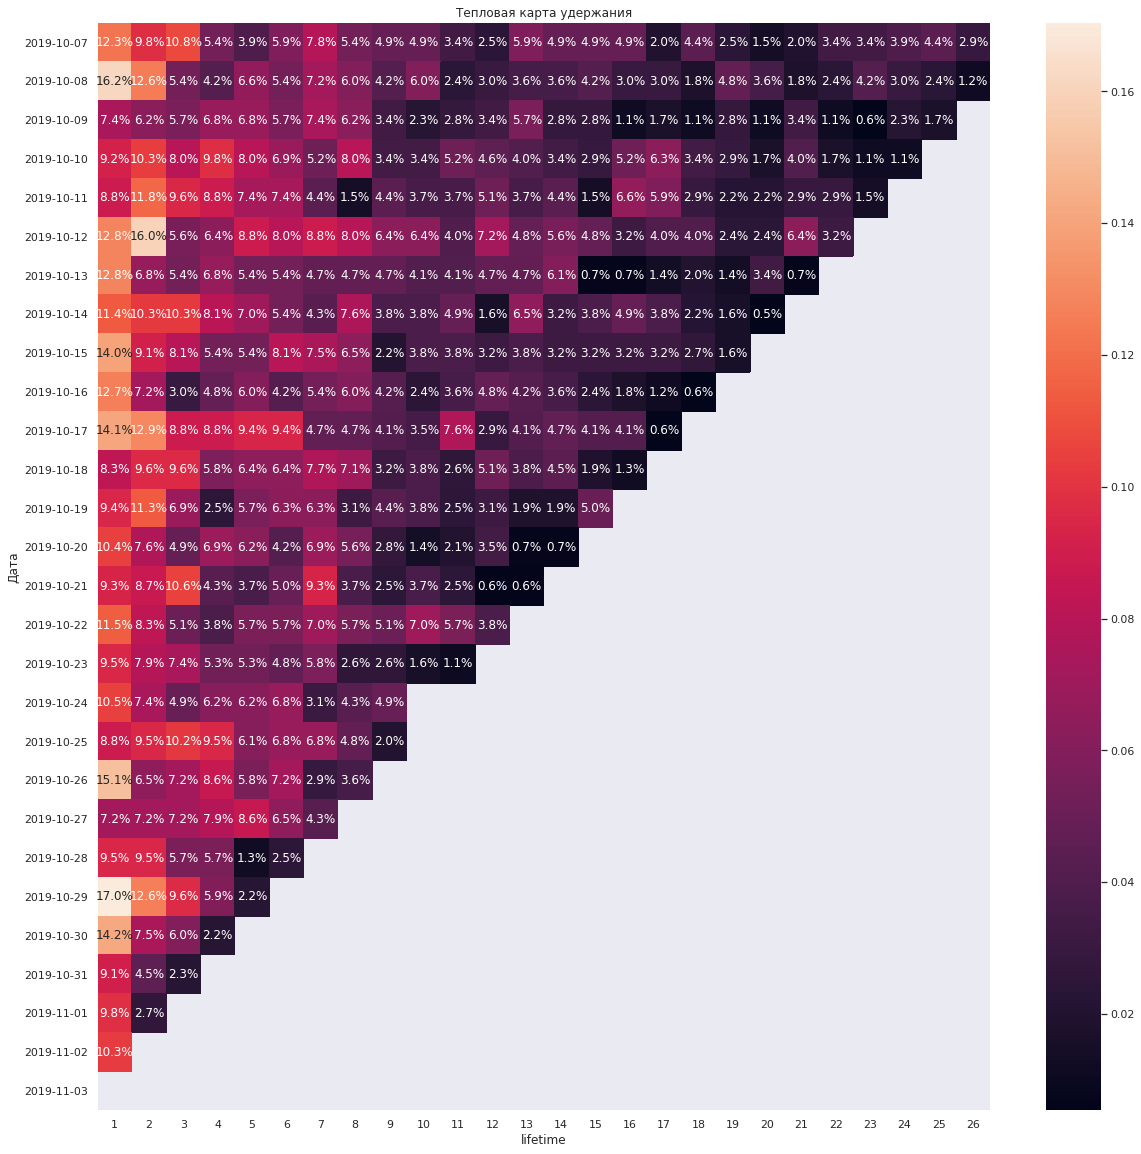

In [41]:
# строим хитмэп без нулевого лайфтайма

plt.figure(figsize=(20, 20)) 
sns.heatmap(
    result_grouped.drop(columns=['cohort_size', 0]),  # удаляем лишние столбцы
    annot=True,  
    fmt='.1%',  # переводим значения в проценты
)
plt.title('Тепловая карта удержания')  
plt.figsize=(30,30)
plt.xlabel('lifetime')
plt.ylabel('Дата')
plt.show()

На тепловой карте можно выделить следующие интересные особенности:

- Максимальное удержание людей приходится на 2019-10-29. Это люди, вернувшиеся на след день в приложение, их кол-во составляет 17% (lifetime = 1 день).
- Минимальное удержание людей приходится на 2019-10-14. Это люди, вернувшиеся на след день в приложение, их кол-во составляет 0,5% (lifetime = 20 день).

- Часто встречаются случаи, когда в один из дней приложением пользовалось мало пользователей, но на следующий день вернулось больше.
- Зависимости между возвращением в приложение и днем недели (будние - выходные) нет.
- После 7-ого дня в приложении люди меньше заходят, видимо обычному человеку достаточно недели, чтобы успеть купить нужнную вещь.

- Условно пользователей можно разделить на тех, кто пользуется приложением первые семь дней и больше восьми дней - между данными двумя категориями есть заметная разница в доле удержания пользователей на рубеже 7-8-9-10 лайфтайма.


Так как нет абсолютной уверенности, что приложение "Ненужные вещи" расчитано на ежедневное взаимодействие с пользователем, попробуем рассмотреть более общую картину удержания пользователей по недельным интервалам лайфтайма:

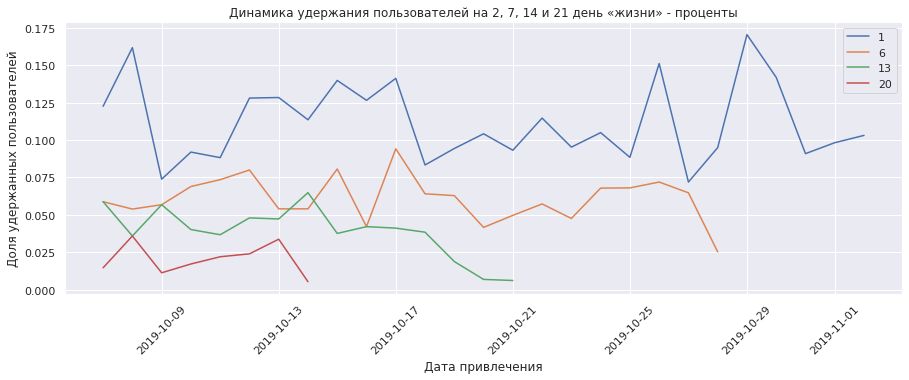

In [42]:
# динамика удержания пользователей в процентах для 2, 7, 14 и 21 дня жизни

result_grouped[[1,6,13,20]].plot(
    grid=True,
    figsize=(15, 5) 
)
 
plt.title('Динамика удержания пользователей на 2, 7, 14 и 21 день «жизни» - проценты')
plt.xlabel('Дата привлечения')
plt.xticks(rotation = 45)
plt.ylabel('Доля удержанных пользователей')
plt.show()

- График динамики удержания пользователей на 2, 7, 14 и 21 лайфтайм в целом показывает нормальное распределение для визуализации такого рода. Исключением можно считать заметные пики и спады, однако установление их точной природы выходит за рамки имеющихся данных.

**Промежуточные выводы - Удержание пользователей**:

- Максимальное удержание людей приходится на 2019-10-29. Это люди, вернувшиеся на след день в приложение, их кол-во составляет 17% (lifetime = 1 день).
- Минимальное удержание людей приходится на 2019-10-14. Это люди, вернувшиеся на след день в приложение, их кол-во составляет 0,5% (lifetime = 20 день).

- Часто встречаются случаи, когда в один из дней приложением пользовалось мало пользователей, но на следующий день вернулось больше.
- Зависимости между возвращением в приложение и днем недели (будние - выходные) нет.
- После 7-ого дня в приложении люди меньше заходят, видимо обычному человеку достаточно недели, чтобы успеть купить нужнную вещь.

- Условно пользователей можно разделить на тех, кто пользуется приложением первые семь дней и больше восьми дней - между данными двумя категориями есть заметная разница в доле удержания пользователей на рубеже 7-8-9 лайфтайма.

- График динамики удержания пользователей на 2, 7, 14 и 21 лайфтайм в целом показывает нормальное распределение для визуализации такого рода. Исключением можно считать заметные пики и спады, однако установление их точной природы выходит за рамки имеющихся данных.

**Рекомендации**:
- Делать больше пуш-уведомлений для людей, которые зарегистрировались более 7 дней назад, чтобы поднять их активность (это могут быть напоминания об отложенных в "избранное" товарах или просто напоминание о сервисе).

- Делать дизайн-изменения в интерфейсе приложения, чтобы у людей не было чувство усталости от одного и того же продукта. К примеру делать баннеры на главном экране в связи с новыми акциями.

### Время взаимодействия с приложением

Начнем с анализа количества уникальных пользователей по датам с накоплением:

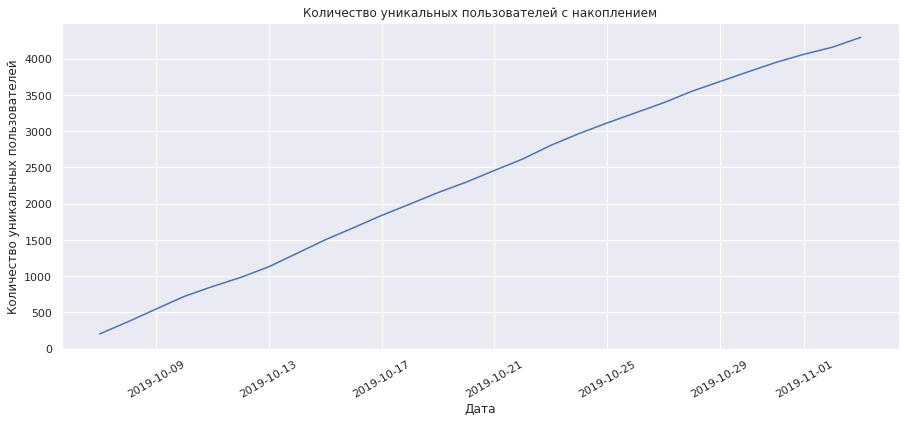

In [43]:
count_unique = []
date = []
for i in range(df.event_date.nunique()): 
    n = df.event_date.min() + pd.Timedelta(f'{i} days')
    a = df.query('event_date <= @n')['user_id'].nunique()
    count_unique.append(a)
    date.append(df.query('event_date <= @n').event_date.max())
    
count_unique_date = pd.DataFrame(data={'event_date': date, 'count_unique': count_unique})

# назначаем размер графика
plt.figure(figsize=(15, 6))
# строим линейный график средствами seaborn
sns.lineplot(x='event_date', y='count_unique', data=count_unique_date)
# формируем заголовок графика и подписи осей средствами matplotlib
plt.title('Количество уникальных пользователей с накоплением')
plt.xlabel('Дата')
plt.ylabel('Количество уникальных пользователей')
plt.xticks(rotation=30)
,
# отображаем график на экране
plt.show()

- При рассмотрении количества уникальных пользователей с накоплением аномальных значений обнаружено не было.

count   mean   std   min    25%    50%    75%    max
user_id  28.00 153.32 24.14 97.00 135.75 156.50 167.75 204.00

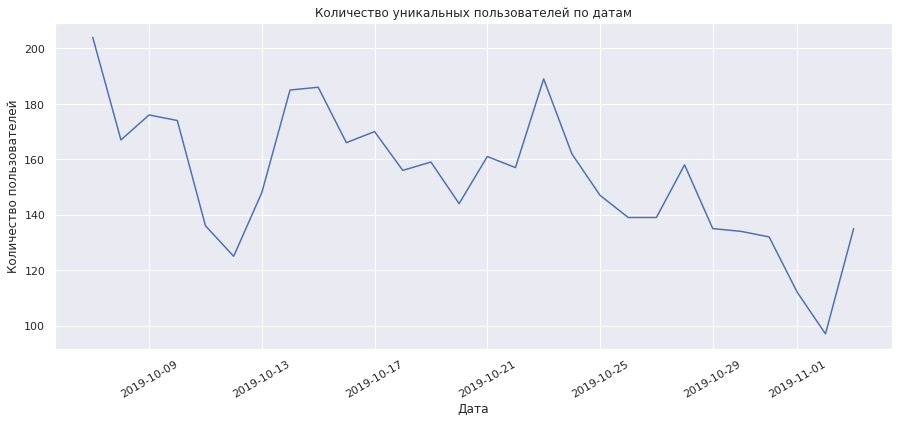

In [44]:
# группируем данные по дате и выводим число уникальных пользователей
number_of_users_in_time = result_raw.groupby(['dt']).agg({'user_id':'nunique'}).reset_index()
display(number_of_users_in_time.describe().T)
# назначаем размер графика
plt.figure(figsize=(15, 6))
# строим линейный график средствами seaborn
sns.lineplot(x='dt', y='user_id', data=number_of_users_in_time)
# формируем заголовок графика и подписи осей средствами matplotlib
plt.title('Количество уникальных пользователей по датам')
plt.xlabel('Дата')
plt.ylabel('Количество пользователей')
plt.xticks(rotation=30)
# отображаем график на экране
plt.show()

- При визуализации количества уникальных пользователей по датам в целом можно отметить спад - если сгладить влияние пиков и спадов, то можно отметить падение медианного значения с ~180 до ~130 пользователей в день. Однако нельзя уверенно сказать о каком-либо тренде, так как в рамках данной работы мы располагаем данными только за четыре недели - причиной спада могли быть краткосрочные внешние факторы вне имеющихся данных.

In [45]:
#количество уникальных сессий для каждого пользователя

app_time = result_raw.reset_index(drop=True)
session_count = app_time.groupby('user_id')['timeout_session_id'].nunique()
session_count.describe()

count   4293.00
mean       2.56
std        3.89
min        1.00
25%        1.00
50%        1.00
75%        3.00
max      111.00
Name: timeout_session_id, dtype: float64

In [46]:
# строим гистограмму распределение кол-ва пользователей в зависимости от количества уникальных сессий

fig = px.histogram(session_count, # загружаем данные
                   range_x=[0, 30], # ограничиваем ось X
                   title='Распределение уникальных пользователей в зависимости от количества сессий', # указываем заголовок
                   nbins=300, # назначаем число корзин
                   barmode='overlay') # выбираем «полупрозрачный» тип отображения столбцов
fig.update_xaxes(title_text='Количество сессий') # подпись для оси X
fig.update_yaxes(title_text='Количество пользователей') # подпись для оси Y
fig.show() # выводим график

In [47]:
session_count.describe()

count   4293.00
mean       2.56
std        3.89
min        1.00
25%        1.00
50%        1.00
75%        3.00
max      111.00
Name: timeout_session_id, dtype: float64

In [48]:
# строим гистограмму распределение кол-ва пользователей группируя

fig = px.histogram(session_count, # загружаем данные
                   range_x=[0, 30], # ограничиваем ось X
                   title='Распределение кол-ва уникальных пользователей\
 в зависимости от количества сессий', # указываем заголовок
                   nbins=100, # назначаем число корзин
                   barmode='overlay') # выбираем «полупрозрачный» тип отображения столбцов
fig.update_xaxes(title_text='Количество сессий') # подпись для оси X
fig.update_yaxes(title_text='Количество пользователей') # подпись для оси Y
fig.show() # выводим график

- Абсолютное большинство уникальных пользователей в имеющихся данных провели всего одну сессию в приложении. В целом же можно выделить три группы пользователей по посещениям: пользователи с 1-ой сессией (2186 человек), пользователи с 2-3 сессиями (1385 человек) и пользователи с 4+ сессиями (722 человека).

In [49]:
duration = app_time.copy()
duration_first = duration.groupby(['user_id','timeout_session_id']).agg({'event_time': 'first'})
duration_last = duration.groupby(['user_id','timeout_session_id']).agg({'event_time': 'last'})

duration_mean = duration_first.merge(duration_last, on=['user_id','timeout_session_id'],how='left')
duration_mean = duration_mean.rename(columns={'event_time_x':'event_time_first', 
                        'event_time_y':'event_time_last'})
duration_mean['duration'] = duration_mean['event_time_last'] - duration_mean['event_time_first']
duration_mean = duration_mean

display(duration_mean)

event_time_first  \
user_id                              timeout_session_id                       
0001b1d5-b74a-4cbf-aeb0-7df5947bf349 1                  2019-10-07 13:39:45   
                                     2                  2019-10-09 18:33:55   
                                     3                  2019-10-21 19:52:30   
                                     4                  2019-10-22 11:18:14   
00157779-810c-4498-9e05-a1e9e3cedf93 5                  2019-10-19 21:34:33   
...                                                                     ...   
fffb9e79-b927-4dbb-9b48-7fd09b23a62b 10971              2019-11-02 01:16:48   
                                     10972              2019-11-02 18:01:27   
                                     10973              2019-11-02 19:25:53   
                                     10974              2019-11-03 14:32:55   
                                     10975              2019-11-03 15:36:01   

                                                            event_time_last  \
user_id                              timeout_session_id                       
0001b1d5-b74a-4cbf-aeb0-7df5947bf349 1                  2019-10-07 13:49:41   
                                     2                  2019-10-09 18:42:22   
                                     3                  2019-10-21 20:07:30   
                                     4                  2019-10-22 11:30:52   
00157779-810c-4498-9e05-a1e9e3cedf93 5                  2019-10-19 21:59:54   
...                                                                     ...   
fffb9e79-b927-4dbb-9b48-7fd09b23a62b 10971              2019-11-02 01:16:48   
                                     10972              2019-11-02 18:17:41   
                                     10973              2019-11-02 19:30:50   
                                     10974              2019-11-03 14:48:44   
                                     10975              2019-11-03 16:08:25   

                                                               duration  
user_id                              timeout_session_id                  
0001b1d5-b74a-4cbf-aeb0-7df5947bf349 1                  0 days 00:09:56  
                                     2                  0 days 00:08:27  
                                     3                  0 days 00:15:00  
                                     4                  0 days 00:12:38  
00157779-810c-4498-9e05-a1e9e3cedf93 5                  0 days 00:25:21  
...                                                                 ...  
fffb9e79-b927-4dbb-9b48-7fd09b23a62b 10971              0 days 00:00:00  
                                     10972              0 days 00:16:14  
                                     10973              0 days 00:04:57  
                                     10974              0 days 00:15:49  
                                     10975              0 days 00:32:24  

[10975 rows x 3 columns]

In [50]:
duration_mean.query('duration == "0 days 00:00:00"')

event_time_first  \
user_id                              timeout_session_id                       
00157779-810c-4498-9e05-a1e9e3cedf93 12                 2019-11-03 17:12:09   
00551e79-152e-4441-9cf7-565d7eb04090 24                 2019-10-29 02:17:12   
00753c79-ea81-4456-acd0-a47a23ca2fb9 31                 2019-10-20 14:57:06   
                                     32                 2019-10-22 19:59:00   
00a93a72-3bbc-4ee7-8a81-7134f45ae009 39                 2019-10-18 15:51:02   
...                                                                     ...   
fffb9e79-b927-4dbb-9b48-7fd09b23a62b 10948              2019-10-16 22:51:41   
                                     10949              2019-10-17 11:49:24   
                                     10968              2019-10-30 00:15:43   
                                     10969              2019-10-30 11:31:45   
                                     10971              2019-11-02 01:16:48   

                                                            event_time_last  \
user_id                              timeout_session_id                       
00157779-810c-4498-9e05-a1e9e3cedf93 12                 2019-11-03 17:12:09   
00551e79-152e-4441-9cf7-565d7eb04090 24                 2019-10-29 02:17:12   
00753c79-ea81-4456-acd0-a47a23ca2fb9 31                 2019-10-20 14:57:06   
                                     32                 2019-10-22 19:59:00   
00a93a72-3bbc-4ee7-8a81-7134f45ae009 39                 2019-10-18 15:51:02   
...                                                                     ...   
fffb9e79-b927-4dbb-9b48-7fd09b23a62b 10948              2019-10-16 22:51:41   
                                     10949              2019-10-17 11:49:24   
                                     10968              2019-10-30 00:15:43   
                                     10969              2019-10-30 11:31:45   
                                     10971              2019-11-02 01:16:48   

                                                        duration  
user_id                              timeout_session_id           
00157779-810c-4498-9e05-a1e9e3cedf93 12                   0 days  
00551e79-152e-4441-9cf7-565d7eb04090 24                   0 days  
00753c79-ea81-4456-acd0-a47a23ca2fb9 31                   0 days  
                                     32                   0 days  
00a93a72-3bbc-4ee7-8a81-7134f45ae009 39                   0 days  
...                                                          ...  
fffb9e79-b927-4dbb-9b48-7fd09b23a62b 10948                0 days  
                                     10949                0 days  
                                     10968                0 days  
                                     10969                0 days  
                                     10971                0 days  

[2388 rows x 3 columns]

In [51]:
# рассмотрим события в сессиях с нулевой длительностью
app_time.query('session_start == session_end')['event_name'].value_counts()

tips_show        1024
photos_show       648
search            410
contacts_show     154
map               119
advert_open        51
favorites_add      37
tips_click         13
contacts_call       1
Name: event_name, dtype: int64

- В результате расчетов длительности сессий пользователей было обнаружено значительное количество сессий с нулевой длительностью - такие сессии состоят из одного действия, из-за чего возникают аномальные данные. Рассмотрев такие сессии в разрезе совершенных событий событий, аномальные сессии можно разделить на две категории. 
- - К первой категории можно отнести события `tips_show`, `search`, `advert_open`; ко второй - все остальные обнаруженные события. Разница между категориями аномальных сессий в том, что первую категорию можно обьяснить действиями пользователя (предложено одно обьявление, искали что-то в приложении и не нашли, случайно открыли ссылку и сразу закрыли, и т.п.), тогда как природа возникновения данных второй категории вероятнее всего является либо результатом технической ошибки со стороны работы приложения, так как многие из сессий состоят из событий, которые неправдоподобно считать самостоятельными (`contacts_show`, `tips_click` без `tips_show` и т.п.), либо продолжением пользователем прошлой сессии через промежуток времени с места остановки.
- В любом случае, так как аномальные данные совместно составляют около 20% от всех сессий (а вторая категория отдельно - около 10%), удалить данные строки из датасета без влияния на дальнейшие результаты исследования не представляется возможным. 


Оставим данные как есть и рассмотрим данные по длительности сессий вместе и отдельно от аномальных значений:

In [52]:
print('Все сессии:')
display(duration_mean.describe())
print()
print('Сессии без аномальных значений:')
duration_mean.query('duration != "0 days 00:00:00"').describe()

Все сессии:


duration
count                      10975
mean   0 days 00:10:48.679908883
std    0 days 00:16:06.447260589
min              0 days 00:00:00
25%              0 days 00:00:12
50%              0 days 00:04:56
75%              0 days 00:14:57
max              0 days 03:53:39


Сессии без аномальных значений:


duration
count                       8587
mean   0 days 00:13:49.074414813
std    0 days 00:17:01.870273899
min              0 days 00:00:01
25%              0 days 00:02:54
50%              0 days 00:08:17
75%       0 days 00:18:42.500000
max              0 days 03:53:39

- Прежде чем анализировать параметры длительности сессий пользователей, необходимо вспомнить что само разделение пользователей по сессиям в рамках данной работы является результатом отсутствия разделений по сессиям в исходных данных. В качестве разделительного фактора был выбран примерный интервал неактивности пользователей, что накладывает отпечаток на итоговые результаты исследования. Настоятельно рекомендуется провести отдельную работу по возможным способам разделения сессий пользователей и на основе этого применить итоговые выводы на исходных данных последующих работ для более точных результатов.


- Медианное значение длительности сессии пользователя может варьироваться от 5 до 8 минут. Учитывая, что длительность как параметр была составлена из суммы времени между событиями и учитывает только непосредственное и непрерывное взаимодействие пользователей с приложением, данные значения медианы выглядят вполне правдоподобно.


- Минимальные значения в 00:00:01 (без учета аномалий) сильно меньше медианы и среднего значения, однако их можно обьяснить возможным поведением пользователей, как непредумышленное взаимодествие с приложением и скорый выход из него. Максимальные значения в несколько часов также можно обьяснить поведением пользователей. Однако, для более точной работы с аномальными значениями, а также с построением воронки событий и событийной аналитикой в целом, рекомендуется начать выгружать в базу данных события взаимодействия пользователей с приложением: запуск/завершение работы приложения, уход приложения в фоновый режим и т.п. Данная информация поможет сделать будущие исследовательские работы по приложению более точными и информативными с точки зрения событийной аналитики.

**Промежуточные выводы - Время взаимодействия пользователей с приложением**

- При рассмотрении количества уникальных пользователей с накоплением аномальных значений обнаружено не было.


- При визуализации количества уникальных пользователей по датам в целом можно отметить спад - если сгладить влияние пиков и спадов, то можно отметить падение медианного значения с ~180 до ~130 пользователей в день. Однако нельзя уверенно сказать о каком-либо тренде, так как в рамках данной работы мы располагаем данными только за четыре недели - причиной спада могли быть краткосрочные внешние факторы вне имеющихся данных.


- Абсолютное большинство уникальных пользователей в имеющихся данных провели всего одну сессию в приложении. В целом же можно выделить три группы пользователей по посещениям: пользователи с 1-ой сессией (2186 человек), пользователи с 2-3 сессиями (1385 человек) и пользователи с 4+ сессиями (722 человека).


- В результате расчетов длительности сессий пользователей было обнаружено значительное количество сессий с нулевой длительностью - такие сессии состоят из одного действия, из-за чего возникают аномальные данные. Рассмотрев такие сессии в разрезе совершенных событий событий, аномальные сессии можно разделить на две категории. 
- - К первой категории можно отнести события `tips_show`, `search`, `advert_open`; ко второй - все остальные обнаруженные события. Разница между категориями аномальных сессий в том, что первую категорию можно обьяснить действиями пользователя (предложено одно обьявление, искали что-то в приложении и не нашли, случайно открыли ссылку и сразу закрыли, и т.п.), тогда как природа возникновения данных второй категории вероятнее всего является либо результатом технической ошибки со стороны работы приложения, так как многие из сессий состоят из событий, которые неправдоподобно считать самостоятельными (`contacts_show`, `tips_click` без `tips_show` и т.п.), либо продолжением пользователем прошлой сессии через промежуток времени с места остановки.
- В любом случае, так как аномальные данные совместно составляют около 20% от всех сессий (а вторая категория отдельно - около 10%), удалить данные строки из датасета без влияния на дальнейшие результаты исследования не представляется возможным. 



- Прежде чем анализировать параметры длительности сессий пользователей, необходимо вспомнить что само разделение пользователей по сессиям в рамках данной работы является результатом отсутствия разделений по сессиям в исходных данных. В качестве разделительного фактора был выбран примерный интервал неактивности пользователей, что накладывает отпечаток на итоговые результаты исследования. Настоятельно рекомендуется провести отдельную работу по возможным способам разделения сессий пользователей и на основе этого применить итоговые выводы на исходных данных последующих работ для более точных результатов.


- Медианное значение длительности сессии пользователя может варьироваться от 5 до 8 минут. Учитывая, что длительность как параметр была составлена из суммы времени между событиями и учитывает только непосредственное и непрерывное взаимодействие пользователей с приложением, данные значения медианы выглядят вполне правдоподобно.


- Минимальные значения в 00:00:01 (без учета аномалий) сильно меньше медианы и среднего значения, однако их можно обьяснить возможным поведением пользователей, как непредумышленное взаимодествие с приложением и скорый выход из него. Максимальные значения в несколько часов также можно обьяснить поведением пользователей. Однако, для более точной работы с аномальными значениями, а также с построением воронки событий и событийной аналитикой в целом, рекомендуется начать выгружать в базу данных события взаимодействия пользователей с приложением: запуск/завершение работы приложения, уход приложения в фоновый режим и т.п. Данная информация поможет сделать будущие исследовательские работы по приложению более точными и информативными с точки зрения событийной аналитики.

### Частота совершения событий среди пользователей

event_name  count  nunique  share_users
8      tips_show  40055     2801        65.20
6         search   6784     1666        38.80
4            map   3881     1456        33.90
5    photos_show  10012     1095        25.50
2  contacts_show   4529      981        22.90
0    advert_open   6164      751        17.50
3  favorites_add   1417      351         8.20
7     tips_click    814      322         7.50
1  contacts_call    541      213         5.00

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


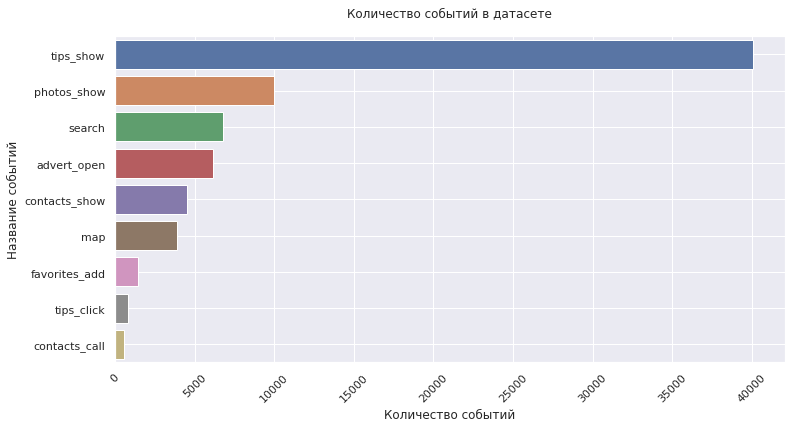

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


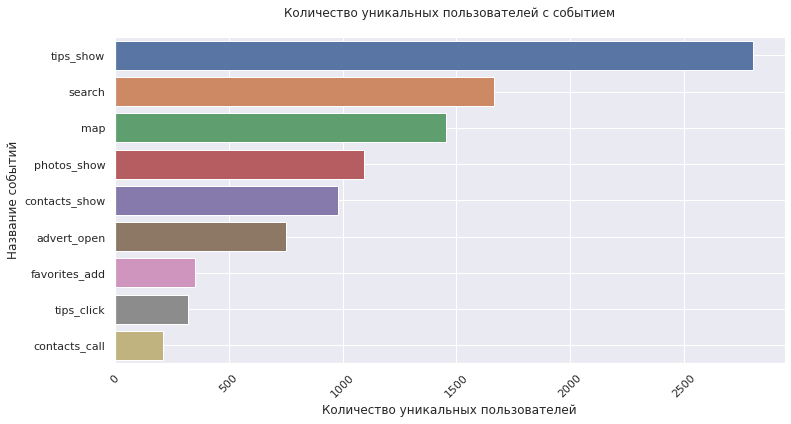

In [53]:
# сколько пользователей совершали каждое из событий
pivot_df = (result_raw
            .groupby('event_name')
            .agg({'user_id': ['count', 'nunique']})
            .droplevel(level=0, axis=1)
            .reset_index()
            .sort_values(by='nunique', ascending = False)
           )

# доля пользователей, которые хоть раз совершали событие.
pivot_df['share_users'] = round(pivot_df['nunique']/(df['user_id'].nunique())*100, 1)
display(pivot_df)

print('- ' * 60)

plt.figure(figsize=(12, 6))
sns.barplot(x = 'count',
            y = 'event_name',
            data = pivot_df.sort_values(by='count', ascending = False))
plt.title('Количество событий в датасете', pad = 20)
plt.ylabel('Название событий')
plt.xlabel('Количество событий')
plt.xticks(rotation=45)
plt.grid(visible=True)
plt.show()

print('- ' * 60)

plt.figure(figsize=(12, 6))
sns.barplot(x = 'nunique',
            y = 'event_name',
            data = pivot_df)
plt.title('Количество уникальных пользователей с событием', pad = 20)
plt.ylabel('Название событий')
plt.xlabel('Количество уникальных пользователей',)
plt.xticks(rotation=45)
plt.grid(visible=True)
plt.show()

- `tips_show`: Данное событие является лидирующим в списках по распространенности с многократным отрывом - 40 тыс. событий в датасете. Вероятно, что каждое рекомендованное обьявление имеет метку `tips_show`, а на странице их может быть несколько - так можно обьяснить распространенность события. Уникальных пользователей, у которых встречается это событие - 2.8 тысяч.
- `photos_show`: 10 тыс. событий. и 1 тыс. уникальных пользователей, у которых оно хоть раз было.
- `search`: 6.7 тыс. событий и у 1.6 тыс. уникальных пользователей оно встречается. По количеству событий меньше, чем `photos_show`, но по уникальным пользователям - больше. Вполне вероятно, что при одном поиске можно посмотреть фотографии разных обьявлений - что и влияет на статистику.
- `advert_open`: 6.1 тыс. событий - и всего 700 уникальных пользователей. Не исключено, что для просмотра практически всей информации об обьявлении заходить в карточку обьявления не обязательно и из-за этого присутствует смещение по статистике.
- `show_contacts`: 4.5 тыс событий и 980 пользователей, у которых это событие есть. Больше, чем у кого есть `advert_open` и `tips_click` вместе взятые, что подтверждает отсутствие необходимости заходить в карточку обьявления для просмотра контактов.
- `map`: 3.8 тыс. событий и 1.4 тыс пользователей с этим событием. Пользователей больше чем у `photos_show`, а событий намного меньше - что логично, так как на одной карте показывается много обьявлений.
- `favorites_add`: 1.4 тысячи событий и 350 человек, кто использует функционал "Избранное сообщение". По расчетам, функция популярна у 8% пользователей.
- `tips_click`: 800 событий и 300 человек заходили в карточку рекомендованного обьявления.
- `contacts_call`: 540 событий и 210 человек, кто использует функционал "Звонок с сайта". Это обьясняется тем, что большинство людей предпочитают звонить самостоятельно со своим личных телефонов.

Далее визуалируем распределение событий и пользователей в рамках временного промежутка датасета:

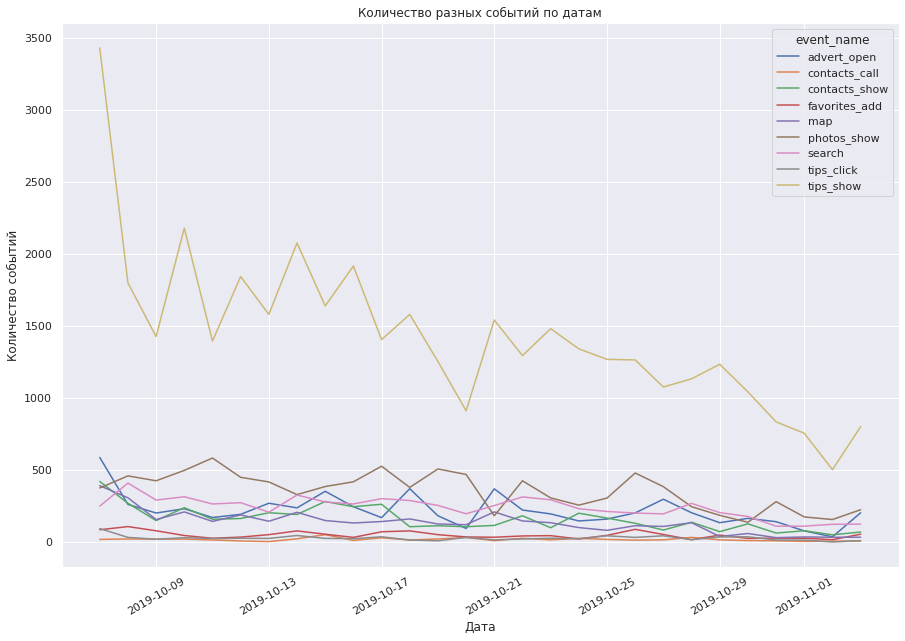

In [54]:
# группируем данные по дате и названию события и считаем количество событий
number_of_events_in_time = result_raw.groupby(['dt','event_name']).agg({'user_id':'count'}).reset_index()

# назначаем размер графика
plt.figure(figsize=(15, 10))
# строим линейный график средствами seaborn
sns.lineplot(x='dt', y='user_id', data=number_of_events_in_time, hue = 'event_name')
# формируем заголовок графика и подписи осей средствами matplotlib
plt.title('Количество разных событий по датам')
plt.xlabel('Дата')
plt.ylabel('Количество событий')
plt.xticks(rotation=30)
# отображаем график на экране
plt.show()

- Динамика количества событий с течением времени кардинально не меняется. Для событий `tips_show` всплески и падения скорей всего частично связаны с количеством уникальных пользователей в этот день на сайте, чем с какой-либо другой причиной. Для всех остальных событий датасета можно отметить небольшую тенденцию к положительному росту количества, но нет уверенности в достаточном количестве данных для подтверждения или опровержения данного предположения.

На этапе предобработки мы высчитали среднее количество событий в сессии, используя за основу общее число событий, сессий и длительность интервала перерыва между ними: количество уникальных сессий пользователей - 10975, среднее количество сессий на пользователя - 2.56, среднее число событий в сессий - 6.76.

Далее рассмотрим более подробно распределение событий по сессиям:

count   10975.00
mean        6.76
std         8.96
min         1.00
25%         2.00
50%         4.00
75%         8.00
max       139.00
Name: event_count, dtype: float64

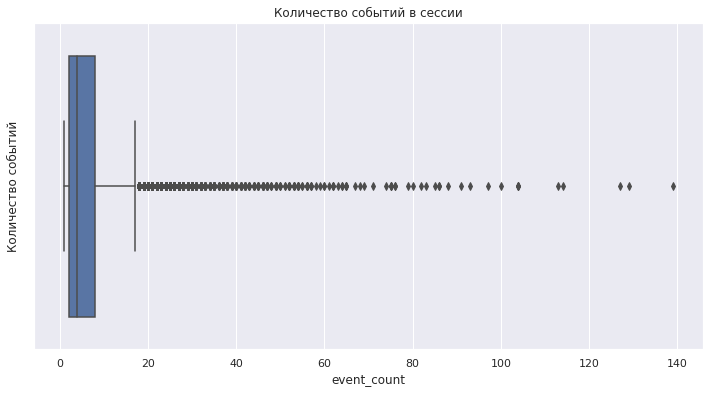

In [55]:
# группируем данные по номеру сессии и собираем количество событий в каждой
count_event_for_session = (
    result_raw
    .groupby('timeout_session_id')
    .agg({'event_name':'count'})
    .rename(columns={'event_name': 'event_count'})
    ).reset_index()

# выведем численные данные на экран
display(count_event_for_session['event_count'].describe().T)

# строим график boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='event_count', data=count_event_for_session)
# указываем заголовок графика и подписи осей средствами matplotlib
plt.title('Количество событий в сессии')
plt.ylabel('Количество событий')

# отображаем график на экране
plt.show()

График показывает большое количество выбросов - попробуем снова визуализировать без наиболее выбивающихся значений:

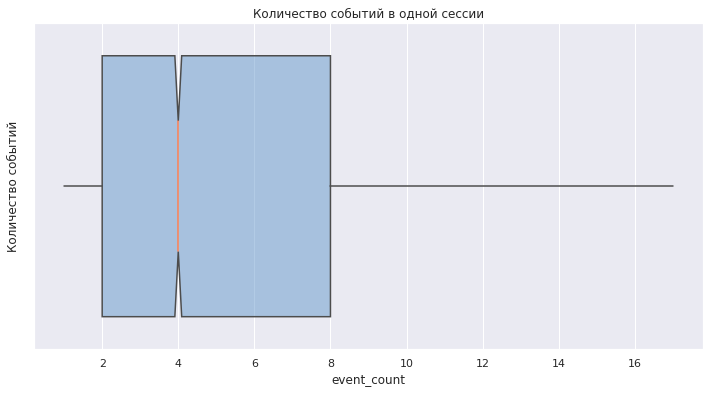

In [56]:
# строим график boxplot без отображения выбросов
plt.figure(figsize=(12, 6))
sns.boxplot(x='event_count', 
            data=count_event_for_session, 
            notch=True, showcaps=False,
            flierprops={"marker": "x"},
            boxprops={"facecolor": (.4, .6, .8, .5)},
            medianprops={"color": "coral"},
            showfliers=False
           )
# указываем заголовок графика и подписи осей средствами matplotlib
plt.title('Количество событий в одной сессии')
plt.ylabel('Количество событий')

# отображаем график на экране
plt.show()

In [57]:
# рассмотрим квантили количества событий в сессии
count_event_for_session['event_count'].quantile([ .5, .75, .9, .95, .99, .999])

0.50    4.00
0.75    8.00
0.90   15.00
0.95   23.00
0.99   44.00
1.00   91.05
Name: event_count, dtype: float64

- Согласно графикам размаха количества событий в сессиях, около 92.5% всех значений укладываются в диапазон от 1 до 18 событий, т.е. в межквартильный размах "ящика с усами". Оставшиеся 7.5% значений довольно сильно выбиваются на фоне остальных - 99-й квантиль превышает медиану в 11 раз, а максимальное значение - почти в 35 раз. Однако из-за природы данных, их абнормального распределения и большого количества выбросов, необходимо удалить слишком статистически значимое количество выбивающихся значений для нормализации данных, что повлияет дальнейшие результаты. В связи с этим принято решение не редактировать данные и двигаться дальше.

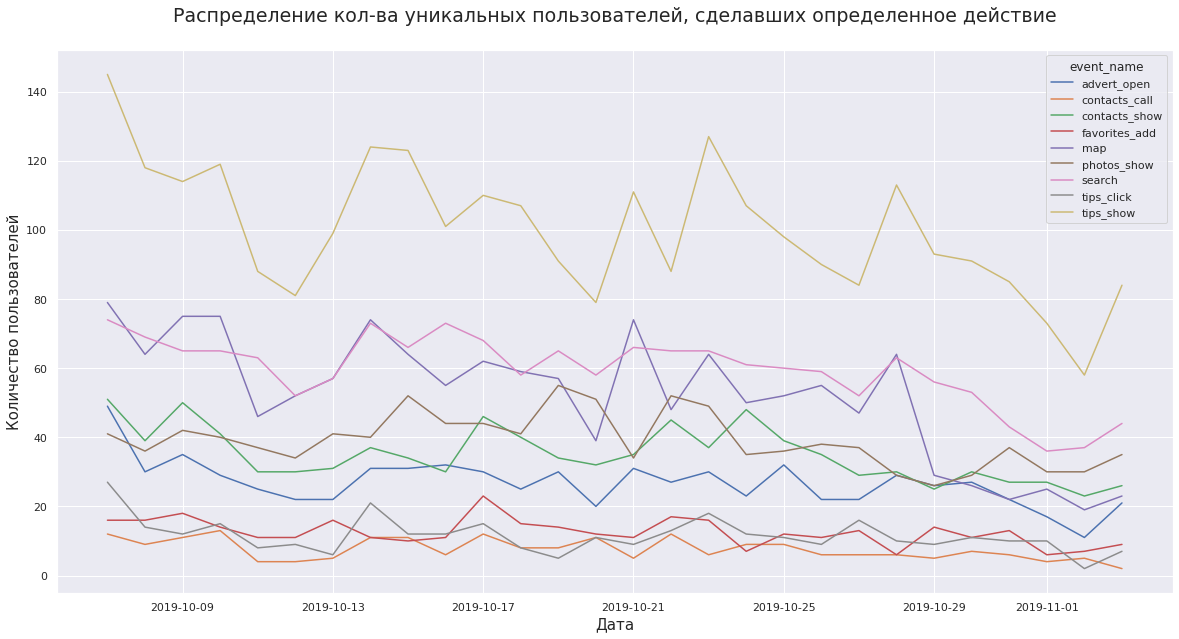

In [58]:
app_time.pivot_table(
    index='dt',  # даты посещений
    columns='event_name',  # действие
    values='user_id',  # пользователи
    aggfunc='nunique'  # подсчёт уникальных значений
).plot(figsize=(20, 10), grid=True)
sns.color_palette("Set2")
plt.xlabel('Дата', size=15)
plt.ylabel('Количество пользователей', size=15)
plt.title('Распределение кол-ва уникальных пользователей, сделавших определенное действие' + '\n', size=19)

plt.show()

- Самое максимальное количество действий приходится на 7 октября 2019 (5586 действие)


- Самое минимальное количество действий приходится на 2 ноября 2019 (922 действий)


- Большинство показателей событий показывают нейтральную или заметную отрицательную тенденцию роста.

**Промежуточные выводы - Частота совершения событий пользователями**:

На этапе предобработки мы высчитали среднее количество событий в сессии, используя за основу общее число событий, сессий и длительность интервала перерыва между ними: количество уникальных сессий пользователей - 10975, среднее количество сессий на пользователя - 2.56, среднее число событий в сессий - 6.76. Далее рассмотрим распределение событий среди пользователей подробнее:


- `tips_show`: Данное событие является лидирующим в списках по распространенности с многократным отрывом - 40 тыс. событий в датасете. Вероятно, что каждое рекомендованное обьявление имеет метку `tips_show`, а на странице их может быть несколько - так можно обьяснить распространенность события. Уникальных пользователей, у которых встречается это событие - 2.8 тысяч.
- `photos_show`: 10 тыс. событий. и 1 тыс. уникальных пользователей, у которых оно хоть раз было.
- `search`: 6.7 тыс. событий и у 1.6 тыс. уникальных пользователей оно встречается. По количеству событий меньше, чем `photos_show`, но по уникальным пользователям - больше. Вполне вероятно, что при одном поиске можно посмотреть фотографии разных обьявлений - что и влияет на статистику.
- `advert_open`: 6.1 тыс. событий - и всего 700 уникальных пользователей. Не исключено, что для просмотра практически всей информации об обьявлении заходить в карточку обьявления не обязательно и из-за этого присутствует смещение по статистике.
- `show_contacts`: 4.5 тыс событий и 980 пользователей, у которых это событие есть. Больше, чем у кого есть `advert_open` и `tips_click` вместе взятые, что подтверждает отсутствие необходимости заходить в карточку обьявления для просмотра контактов.
- `map`: 3.8 тыс. событий и 1.4 тыс пользователей с этим событием. Пользователей больше чем у `photos_show`, а событий намного меньше - что логично, так как на одной карте показывается много обьявлений.
- `favorites_add`: 1.4 тысячи событий и 350 человек, кто использует функционал "Избранное сообщение". По расчетам, функция популярна у 8% пользователей.
- `tips_click`: 800 событий и 300 человек заходили в карточку рекомендованного обьявления.
- `contacts_call`: 540 событий и 210 человек, кто использует функционал "Звонок с сайта". Это обьясняется тем, что большинство людей предпочитают звонить самостоятельно со своим личных телефонов.


- Динамика количества событий с течением времени кардинально не меняется. Для событий `tips_show` всплески и падения скорей всего частично связаны с количеством уникальных пользователей в этот день на сайте, чем с какой-либо другой причиной. Для всех остальных событий датасета можно отметить небольшую тенденцию к положительному росту количества, но нет уверенности в достаточном количестве данных для подтверждения или опровержения данного предположения.


- Согласно графикам размаха количества событий в сессиях, около 92.5% всех значений укладываются в диапазон от 1 до 18 событий, т.е. в межквартильный размах "ящика с усами". Оставшиеся 7.5% значений довольно сильно выбиваются на фоне остальных - 99-й квантиль превышает медиану в 11 раз, а максимальное значение - почти в 35 раз. Однако из-за природы данных, их абнормального распределения и большого количества выбросов, необходимо удалить слишком статистически значимое количество выбивающихся значений для нормализации данных, что повлияет дальнейшие результаты. В связи с этим принято решение не редактировать данные и двигаться дальше.


- Самое максимальное количество действий приходится на 7 октября 2019 (5586 действие)


- Самое минимальное количество действий приходится на 2 ноября 2019 (922 действий)


- Большинство показателей событий показывают нейтральную или заметную отрицательную тенденцию роста.

### Распределение целевого события в данных

В качестве целевого события подразумевается событие `contacts_show` - показ пользователю контактов продавца. Рассмотрим подробнее, как это конкретное событие отражено в данных:

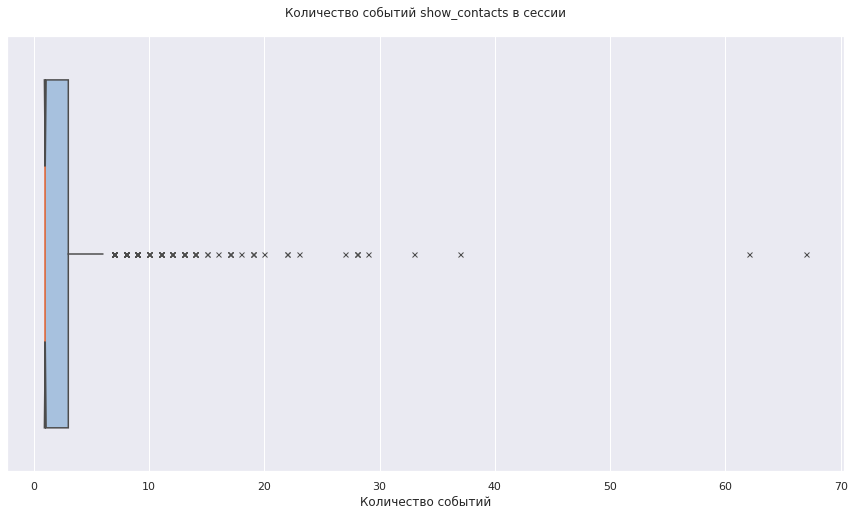

In [59]:
# группируем данные с contact_show по номеру сессии и собираем сколько раз событие было записано
session_with_show_contacts = (
    result_raw
    .query('event_name == "contacts_show"')
    .groupby('timeout_session_id')
    .agg({'event_name':'count'})
    .sort_values(by='event_name', ascending=False)
    .reset_index())

# выведем график через seaborn
plt.figure(figsize=(15, 8))
sns.boxplot(x='event_name', 
            data=session_with_show_contacts, 
            notch=True, showcaps=False,
            flierprops={"marker": "x"},
            boxprops={"facecolor": (.4, .6, .8, .5)},
            medianprops={"color": "coral"},
            showfliers=True
           )
plt.title('Количество событий show_contacts в сессии', size='medium', pad = 20)
plt.xlabel('Количество событий')
plt.show()

count   1796.00
mean       2.52
std        3.74
min        1.00
25%        1.00
50%        1.00
75%        3.00
max       67.00
Name: event_name, dtype: float64

0.90    5.00
0.95    8.00
0.99   17.00
1.00   42.13
Name: event_name, dtype: float64

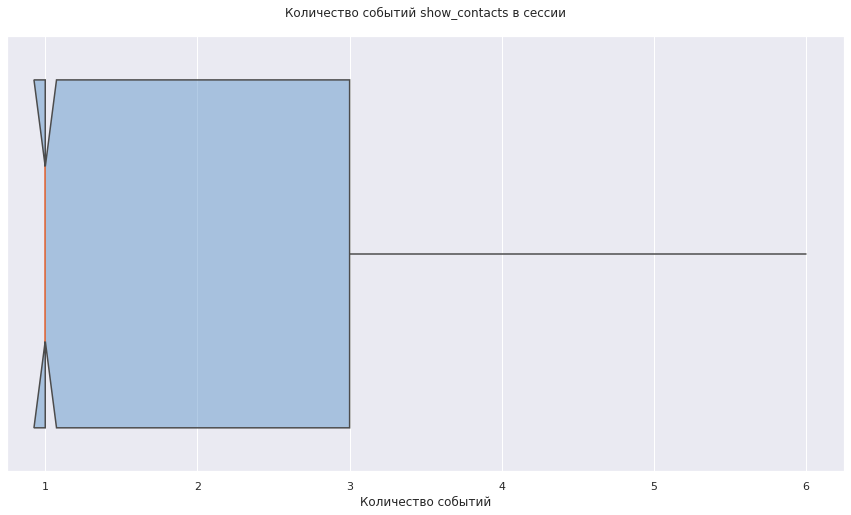

In [60]:
# выведем численную информацию для ориентира
display(session_with_show_contacts['event_name'].describe())
display(session_with_show_contacts['event_name'].quantile([.9, .95, .99, .999]))

# выведем тот же график, но без выбросов
plt.figure(figsize=(15, 8))
sns.boxplot(x='event_name', 
            data=session_with_show_contacts, 
            notch=True, showcaps=False,
            flierprops={"marker": "x"},
            boxprops={"facecolor": (.4, .6, .8, .5)},
            medianprops={"color": "coral"},
            showfliers=False
           )
plt.title('Количество событий show_contacts в сессии', size='medium', pad = 20)
plt.xlabel('Количество событий')
plt.show()

- Как и с общим количеством событий в сессии выше, около 92.5% всех значений укладываются в диапазон от 1 до 6 событий, т.е. в межквартильный размах "ящика с усами". И точно также, оставшиеся 7.5% значений довольно сильно выбиваются на фоне остальных - так как медианное значение - 1 показ контактов в сессии, 99-й квантиль превышает медиану в 17 раз, а максимальное значение - почти в 42 раза. При этом сессии, где есть целевое событие - 1796 или почти 1/5 от количества сессий.

In [61]:
#целевое действие из всего датасета
total_target = df['user_id'].loc[result_raw['event_name'] == 'contacts_show'].nunique()
display('Целевые пользователи из всего датасета:',total_target)

#сумма всех действий
total_act = df['user_id'].nunique()
display('Сумма всех пользователей:',total_act)

#конверсия от всего датасета
total_cr = total_target/total_act*100
display('Конверсия contacts_show от всего датасета:',"{:.2f}".format(total_cr))

'Целевые пользователи из всего датасета:'

981

'Сумма всех пользователей:'

4293

'Конверсия contacts_show от всего датасета:'

'22.85'

- Конверсия в целевое действие для пользователей приложения составляет 22.85%.

In [62]:
#считаем конверсию действий для для каждого дня

day_action = result_raw.pivot_table(
    index='dt',  # даты посещений
    columns='event_name',  # действие
    values='user_id',  # пользователи
    aggfunc='nunique'  # подсчёт  значений
)

day_action['total'] = result_raw.groupby('dt')['user_id'].nunique()

day_action

event_name  advert_open  contacts_call  contacts_show  favorites_add  map  \
dt                                                                          
2019-10-07           49             12             51             16   79   
2019-10-08           30              9             39             16   64   
2019-10-09           35             11             50             18   75   
2019-10-10           29             13             41             14   75   
2019-10-11           25              4             30             11   46   
2019-10-12           22              4             30             11   52   
2019-10-13           22              5             31             16   57   
2019-10-14           31             11             37             11   74   
2019-10-15           31             11             34             10   64   
2019-10-16           32              6             30             11   55   
2019-10-17           30             12             46             23   62   
2019-10-18           25              8             40             15   59   
2019-10-19           30              8             34             14   57   
2019-10-20           20             11             32             12   39   
2019-10-21           31              5             35             11   74   
2019-10-22           27             12             45             17   48   
2019-10-23           30              6             37             16   64   
2019-10-24           23              9             48              7   50   
2019-10-25           32              9             39             12   52   
2019-10-26           22              6             35             11   55   
2019-10-27           22              6             29             13   47   
2019-10-28           29              6             30              6   64   
2019-10-29           26              5             25             14   29   
2019-10-30           27              7             30             11   26   
2019-10-31           22              6             27             13   22   
2019-11-01           17              4             27              6   25   
2019-11-02           11              5             23              7   19   
2019-11-03           21              2             26              9   23   

event_name  photos_show  search  tips_click  tips_show  total  
dt                                                             
2019-10-07           41      74          27        145    204  
2019-10-08           36      69          14        118    167  
2019-10-09           42      65          12        114    176  
2019-10-10           40      65          15        119    174  
2019-10-11           37      63           8         88    136  
2019-10-12           34      52           9         81    125  
2019-10-13           41      57           6         99    148  
2019-10-14           40      73          21        124    185  
2019-10-15           52      66          12        123    186  
2019-10-16           44      73          12        101    166  
2019-10-17           44      68          15        110    170  
2019-10-18           41      58           8        107    156  
2019-10-19           55      65           5         91    159  
2019-10-20           51      58          11         79    144  
2019-10-21           34      66           9        111    161  
2019-10-22           52      65          13         88    157  
2019-10-23           49      65          18        127    189  
2019-10-24           35      61          12        107    162  
2019-10-25           36      60          11         98    147  
2019-10-26           38      59           9         90    139  
2019-10-27           37      52          16         84    139  
2019-10-28           29      63          10        113    158  
2019-10-29           26      56           9         93    135  
2019-10-30           29      53          11         91    134  
2019-10-31           37  

In [63]:
# выделяем contacts_show и делаем график конверсии по дням

variable_1 = day_action['contacts_show'] #переменная для целевого действия
variable_2 = day_action['total'] #переменная для общего кол-ва действий за день

day_con_show = pd.DataFrame(variable_1)

day_total = pd.DataFrame(variable_2)

#считаем конверсию contacts_show для каждого дня

day_cr_con_show = day_con_show['contacts_show']/day_total['total']*100
day_cr_con_show = pd.DataFrame(day_cr_con_show)
day_cr_con_show

#строим столбчатый график конверсии по дням
fig = px.bar(day_cr_con_show,
            labels={'Средний рейтинг'},
                title='Конверсия contacts_show по дням')

fig.update_xaxes(title_text='Дата') # подпись для оси X
fig.update_yaxes(title_text='Конверсия в процентах') # подпись для оси Y

fig.show()

- Наибольшая конверсия в целевое действие была 24 октября 2019 года и составила 29,62%.


- Наименьшая конверсия в целевое действие была 16 октября 2019 года и составила 18,07%.


- Средняя конверсия в целевое действие за весь период по уникальным пользователям - 22,85%.

**Промежуточные выводы - Распределение целевого события в данных**:

- Целевые пользователи из всего датасета - 981 человек из 4293.


- Около 92.5% всех значений укладываются в диапазон от 1 до 6 событий, т.е. в межквартильный размах "ящика с усами". И точно также, оставшиеся 7.5% значений довольно сильно выбиваются на фоне остальных - так как медианное значение - 1 показ контактов в сессии, 99-й квантиль превышает медиану в 17 раз, а максимальное значение - почти в 42 раза. При этом сессии, где есть целевое событие - 1796 или почти 1/5 от количества сессий.


- Наибольшая конверсия в целевое действие была 24 октября 2019 года и составила 29,62%.


- Наименьшая конверсия в целевое действие была 16 октября 2019 года и составила 18,07%.


- Средняя конверсия в целевое действие за весь период по уникальным пользователям - 22,85%.

### Сегментирование пользователей

Ответим на следующие поставленные вопросы в разрезе сегментированных групп:

- Пользователи какой группы склонны часто возвращаться в мобильное приложение (Retention rate)?

- Пользователи какой группы часто делают целевое событие (конверсия в целевое действие)?


Природа исходных данных предполагает, что есть несколько возможных вариантов сегментирования пользователей приложения. На основе имеющихся данных пользователей можно разделить на сегменты по времени суток активности (утро, день, вечер, ночь), комбинациям событий сессии (`tips_click` + `contacts_show`, `favorites_add` + `contacts_show`, и т.д.), по длительности сессий в приложении (например, пользователи с длительностью больше 20 минут, больше 10 и больше 5.) и многие другие варианты. Основная проблема со всеми примерами такой сегментации в том, что с каждым новым шагом исследования она опирается на все более спорное присвоение дополнительных характеристик. 

Например, расчет сессий пользователей в рамках имеющихся данных является заведомо малоточным делом из-за отсутствия данных о начале/окончании сессии пользователя в самом приложении и в выгруженных данных - все рассмотренные на этапе предобработки методы по расчету сессий приносят кардинально разные результаты, заведомо без возможности убедиться в их обьективности, при этом влияя на расчеты и параметры, что сами берут за основу результаты расчета сессий. Событийная аналитика и построение воронки событий также стоит под вопросом из-за отсутствия данных о взаимодействии пользователей с самим приложением вместо обьявлений - на основе исходных данных нельзя сказать с уверенностью, какой путь проходят большинство пользователей перед совершением целевого события. 

Принимая вышесказанное во внимание, за основу разделения пользователей на сегменты возьмем исходные данные о рекламных каналах привлечения пользователей: `yandex`, `google` и `other`. Таким образом, по результатам ответов на вышестоящие вопросы по сегментированным группам, мы сможем сделать выводы об актуальности привлечения пользователей определенных рекламных каналов.

### Удержание пользователей по группам

Используем расчеты и графики из прошлых этапов исследовательского анализа и применим в качестве функции:

In [64]:
def source_retention_hitmap(ad_source):   
    '''
    Функция по расчету удержания пользователей для рекламных каналов.
    В качестве аргумента берем категорию source, строим таблицу удержания,
    затем визуализируем через hitmap процент удержания по дням,
    а через plot - удержание по датам для 2, 7, 14 и 21 лайфтайма группы.
    '''   
    # дата первого события
    min_event_datetime = df[df['source'] == ad_source].groupby(['user_id'])['event_date'].min()
    min_event_datetime.name = 'min_event_datetime'
    final_source = df[df['source'] == ad_source].join(min_event_datetime, on='user_id')

    # вычисляем лайфтайм каждой сессии в днях
    final_source['lifetime'] = (final_source['event_time'] - final_source['min_event_datetime']).dt.days


    final_source = (final_source.rename(columns={'event_date': 'event_date'}).rename(columns={'min_event_datetime': 'date'}))

    # строим таблицу удержания
    retention_source = final_source.pivot_table(index=['date'], columns='lifetime', values='user_id', aggfunc='nunique')


    # вычисляем размеры когорт
    cohort_sizes_source = (final_source.groupby('date').agg({'user_id': 'nunique'}).rename(columns={'user_id': 'cohort_size'}))


    # объединяем размеры когорт и таблицу удержания
    retention_source = cohort_sizes_source.merge(retention_source, on='date', how='left').fillna(0)


    # делим данные таблицы удержания на размеры когорт
    retention_source = (retention_source.div(retention_source['cohort_size'], axis=0).drop(columns=['cohort_size']))

    # строим тепловую карту
    plt.figure (figsize = (21,10))
    fig = sns.heatmap(retention_source.drop(columns=[0]), annot= True, fmt = '.0%', yticklabels=retention_source.index.date)
    plt.title(f'Тепловая карта удержания для группы {ad_source}')
    plt.ylabel(' ')
    plt.show()
    
    # строим график удержания для 2, 7, 14 и 21 лайфтайма
    retention_source[[1,6,13,20]].plot(
    grid=True,
    figsize=(15, 5) 
    )

    plt.title(f'Динамика удержания пользователей на 2, 7, 14 и 21 день жизни - группа {ad_source}')
    plt.xlabel('Дата привлечения')
    plt.xticks(rotation = 45)
    plt.ylabel('Доля удержанных пользователей')
    plt.show()

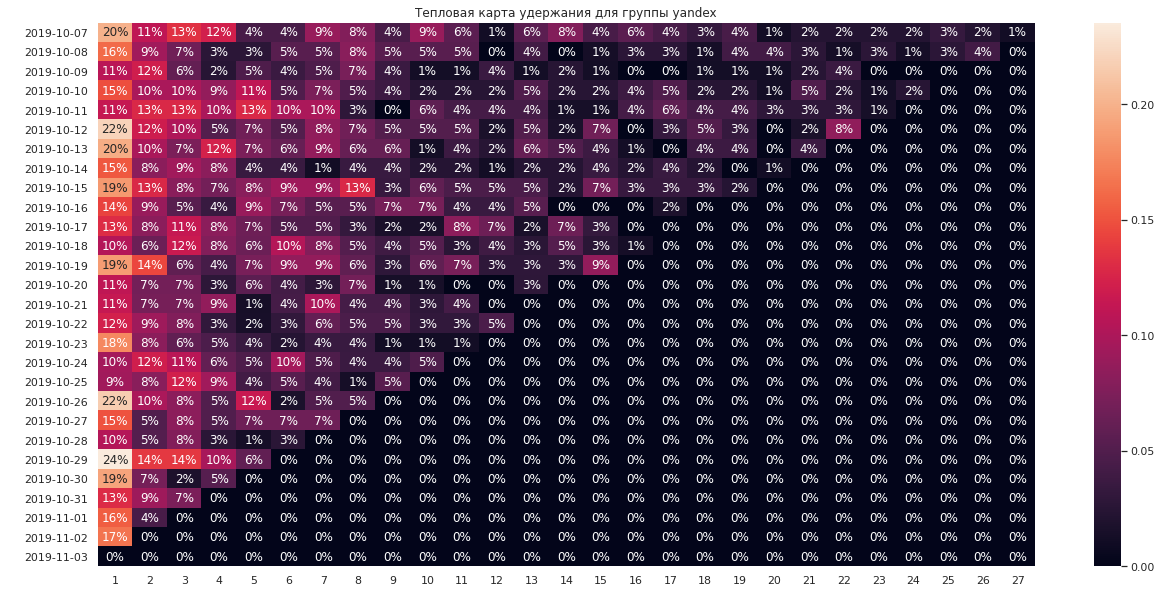

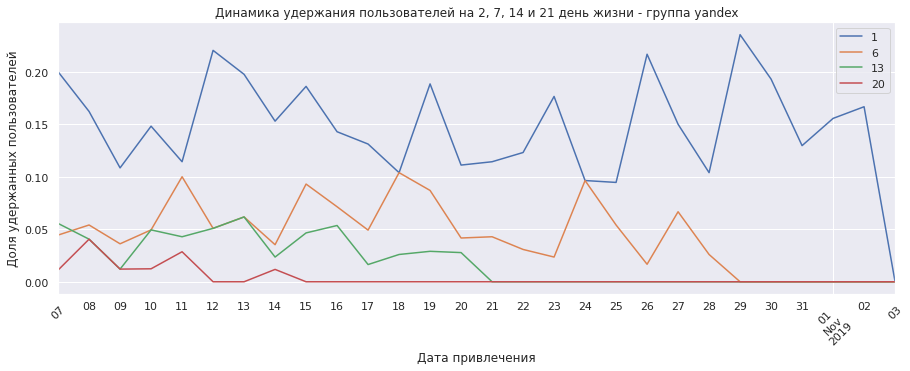

In [65]:
source_retention_hitmap('yandex')

- Динамика удержания пользователей группы `yandex` менее подвержена резким пикам и спадам, показывая средний результат - однако в целом процент удержания группы уступает остальным. Единственным исключением можно считать удержания пользователей на 7 лайфтайм, где группа `yandex` лидирует.

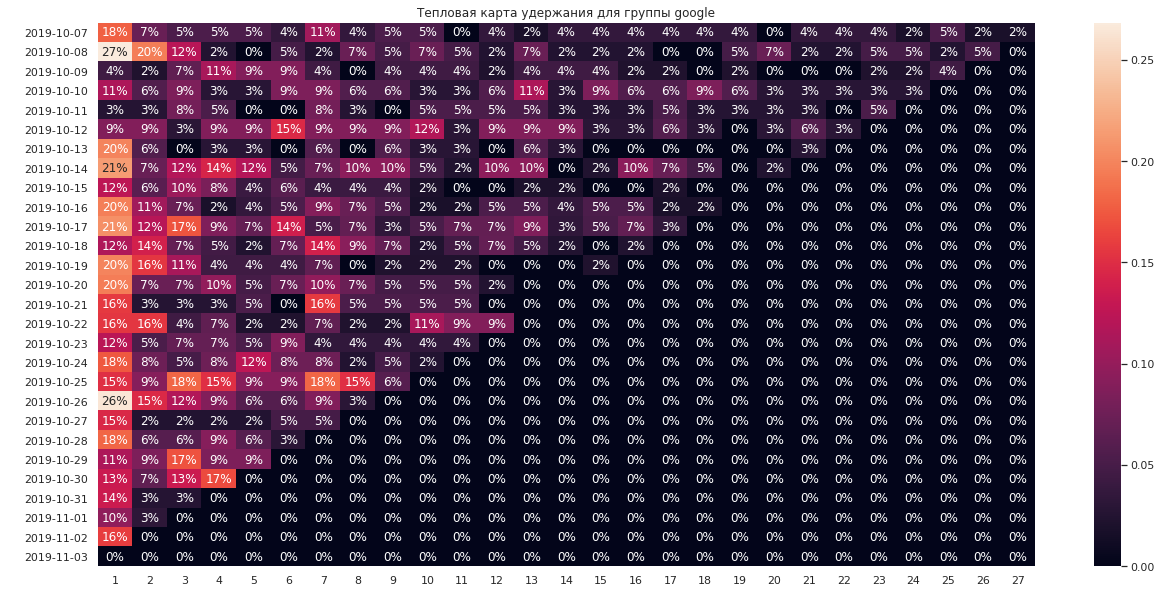

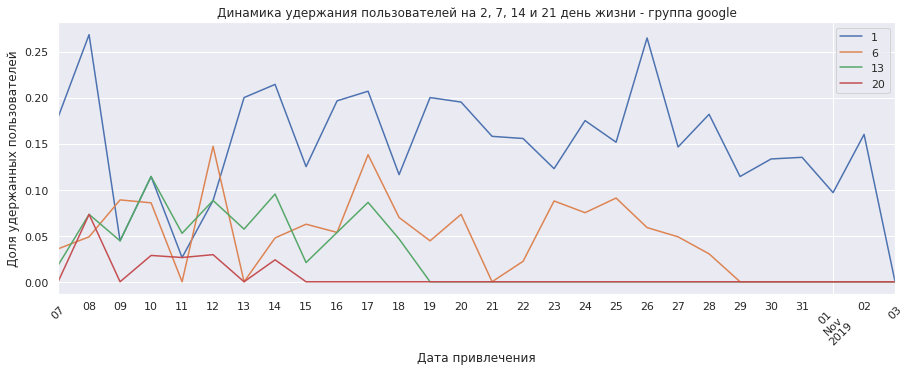

In [66]:
source_retention_hitmap('google')

- Пользователи, привлеченные с рекламного канала `google` имеют аномальный спад удержания в период с 2019-10-09 по 2019-10-12, что немного портит показатели всех лайфтаймов. Однако даже с этим спадом группа `google` лидирует по удержанию для 14 дня жизни. 

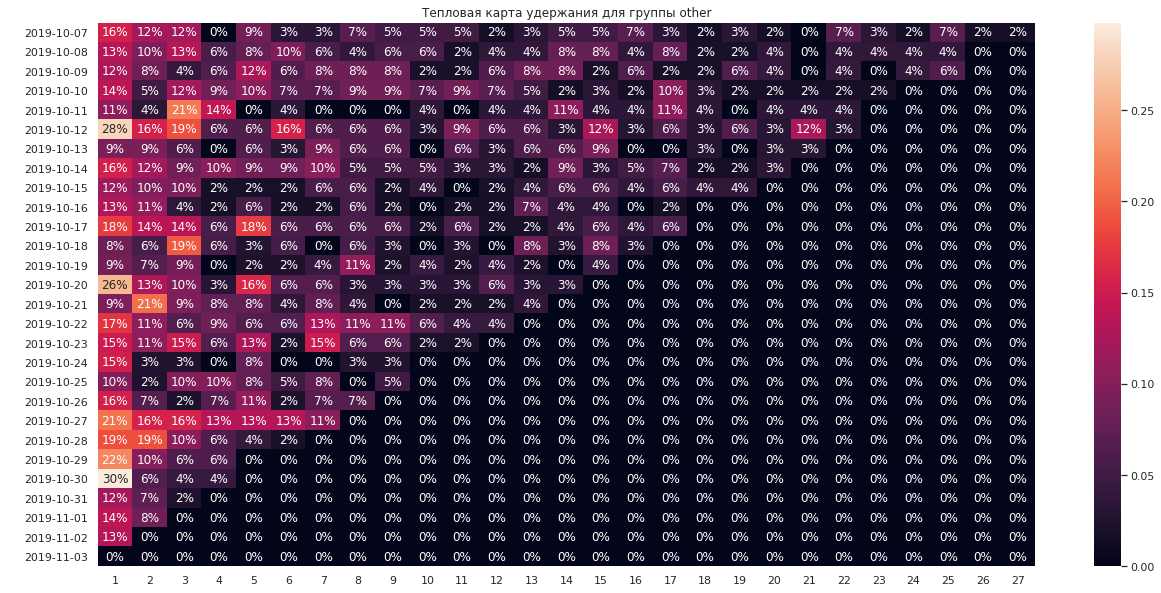

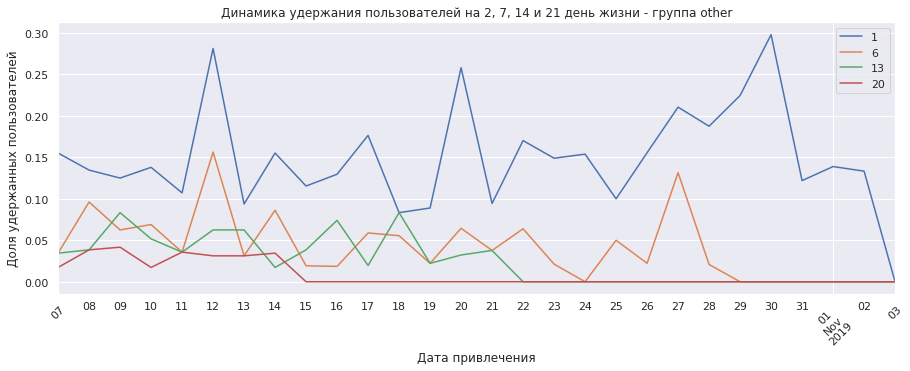

In [67]:
source_retention_hitmap('other')

- Пользователи группы `other` (рекламные каналы привлечения, кроме `yandex` и `google`) превосходят остальные группы по удержанию пользователей на 2 и 21 день жизни, однако на удержании 2 дня заметны аномальные точки роста удержания, вызванные неизвестными факторами - однозначно сказать о преимуществе данной группы над остальными в категории удержания 2 дня сложно. 

**Промежуточный вывод - Удержание пользователей по группам**:

- Группа пользователей рекламного канала `other` лидирует по удержанию на 2 и 21 день жизни, однако на удержании 2 дня заметны аномальные точки роста удержания, вызванные неизвестными факторами - однозначно сказать о преимуществе данной группы над остальными в категории удержания 2 дня сложно. 

- Группа пользователей рекламного канала `yandex` заметно превосходит по удержанию пользователей на 7 день жизни, но уступает по всем остальным параметрам.

- Группа пользователей рекламного канала `google` лидирует по удержанию пользователей на 14 день жизни и имеет средний результат по всем остальным параметрам. 

### Конверсия в целевое действие среди групп пользователей

In [68]:
def source_conversion(ad_source):
    '''
    Функция для расчета конверсии в целевое событие для группы-аргумента.
    Расчитываем конверсию в целевое событие от всех пользователей 
    и от пользователей одной группы.
    '''
    total_target = (
        df['user_id']
        .loc[(result_raw['event_name'] == 'contacts_show') 
             & (result_raw['source'] == ad_source)]
        .nunique()
        )
    display(f'Целевые пользователи из группы {ad_source}:',total_target)
    
    #сумма пользователей группы
    total_source = (
        df['user_id']
        .loc[result_raw['source'] == ad_source]
        .nunique()
        )
    display(f'Сумма всех пользователи из группы {ad_source}:', total_source)

    #сумма всех действий
    total_act = df['user_id'].nunique()
    display('Сумма всех пользователей датасета:',total_act)
    
    display('---' * 40)

    #конверсия от всего датасета
    total_cr = total_target/total_act * 100
    display(f'Конверсия contacts_show для группы {ad_source} из всего датасета:',"{:.2f}".format(total_cr))
    
    #доля целевых пользователей от всей группы
    target_cr = total_target/total_source * 100
    display(f'Доля целевых пользователей группы {ad_source}:',"{:.2f}".format(target_cr))

Рассмотрим конверсию в целевое действие для группы `yandex`:

In [69]:
source_conversion('yandex')

'Целевые пользователи из группы yandex:'

478

'Сумма всех пользователи из группы yandex:'

1934

'Сумма всех пользователей датасета:'

4293

'------------------------------------------------------------------------------------------------------------------------'

'Конверсия contacts_show для группы yandex из всего датасета:'

'11.13'

'Доля целевых пользователей группы yandex:'

'24.72'

- Из трех групп пользователей, привлеченных по рекламным каналам, пользователи группы `yandex` являются самыми многочисленными, превосходя `google` и `other` почти в два раза как по целевым, так и по сумме пользователей. Так же пользователи данной группы показывают самую высокую конверсию в целевое действие как из всего датасета, так самую высокую долю целевых пользователей в рамках группы.

Рассмотрим конверсию в целевое действие для группы `google`:

In [70]:
source_conversion('google')

'Целевые пользователи из группы google:'

275

'Сумма всех пользователи из группы google:'

1129

'Сумма всех пользователей датасета:'

4293

'------------------------------------------------------------------------------------------------------------------------'

'Конверсия contacts_show для группы google из всего датасета:'

'6.41'

'Доля целевых пользователей группы google:'

'24.36'

- Пользователи группы `google` уступают `yandex` в количестве целевых пользователей, сумме пользователей и конверсии в целевых пользователей из всего датасета почти в два раза. 

Рассмотрим конверсию в целевое действие для группы `other`:

In [71]:
source_conversion('other')

'Целевые пользователи из группы other:'

228

'Сумма всех пользователи из группы other:'

1230

'Сумма всех пользователей датасета:'

4293

'------------------------------------------------------------------------------------------------------------------------'

'Конверсия contacts_show для группы other из всего датасета:'

'5.31'

'Доля целевых пользователей группы other:'

'18.54'

- Пользователи группы `other` показывают самые низкие показатели количества целевых пользователей, доли целевых пользователей в группе и конверсии в целевых пользователей из всего датасета.

**Промежуточные выводы - Конверсия в целевое действие среди групп пользователей**:

- Из трех групп пользователей, привлеченных по рекламным каналам, пользователи группы `yandex` являются самыми многочисленными, превосходя `google` и `other` почти в два раза как по целевым, так и по сумме пользователей. Так же пользователи данной группы показывают самую высокую конверсию в целевое действие как из всего датасета, так самую высокую долю целевых пользователей в рамках группы.


- Пользователи группы `google` уступают `yandex` в количестве целевых пользователей, сумме пользователей и конверсии в целевых пользователей из всего датасета почти в два раза. 


- Пользователи группы `other` показывают самые низкие показатели количества целевых пользователей, доли целевых пользователей в группе и конверсии в целевых пользователей из всего датасета.

### Выводы - Исследовательский анализ данных

**Краткие ответы на вопросы**:


- Пользователи какой группы склонны часто возвращаться в мобильное приложение (Retention rate)?

-- Пользователи разных групп превосходят друг друга в удержании на разных днях жизни. Пользователи группы `google` показывают средний результат по большинству параметров и лидируют по удержанию на 14 дне жизни. Пользователи группы `yandex` лидируют по удержанию на 7 дне жизни, тогда как остальные результаты уступают другим группам. Пользователи группы `other` показывают наилучшие результаты как по 2 дню, так и по 21 дню жизни - но именно эта группа так же показала заметное количество аномальных пиков и влияния внешних факторов вне рамок имеющихся данных.

- Пользователи какой группы часто делают целевое событие (конверсия в целевое действие)?

-- Из трех групп пользователей, привлеченных по рекламным каналам, пользователи группы `yandex` являются самыми многочисленными, превосходя `google` и `other` почти в два раза как по целевым, так и по сумме пользователей. Так же пользователи данной группы показывают самую высокую конверсию в целевое действие как из всего датасета, так самую высокую долю целевых пользователей в рамках группы.

**Рекомендации**:

- Делать больше пуш-уведомлений для людей, которые зарегистрировались более 7 дней назад, чтобы поднять их активность (это могут быть напоминания об отложенных в "избранное" товарах или просто напоминание о сервисе).

- Делать дизайн-изменения в интерфейсе приложения, чтобы у людей не было чувство усталости от одного и того же продукта. К примеру делать баннеры на главном экране в связи с новыми акциями.

- Добавить в выгружаемые данные взаимодействие пользователя с приложением на техническом уровне (начало/конец сессии, уход в фоновый режим, акции/скидки внутри приложения, и т.п.) для более точных результатов дальнейших исследований.


**Промежуточные выводы - Удержание пользователей**:

- Максимальное удержание людей приходится на 2019-10-29. Это люди, вернувшиеся на след день в приложение, их кол-во составляет 17% (lifetime = 1 день).

- Минимальное удержание людей приходится на 2019-10-14. Это люди, вернувшиеся на след день в приложение, их кол-во составляет 0,5% (lifetime = 20 день).

- Часто встречаются случаи, когда в один из дней приложением пользовалось мало пользователей, но на следующий день вернулось больше.
- Зависимости между возвращением в приложение и днем недели (будние - выходные) нет.
- После 7-ого дня в приложении люди меньше заходят, видимо обычному человеку достаточно недели, чтобы успеть купить нужнную вещь.

- Условно пользователей можно разделить на тех, кто пользуется приложением первые семь дней и больше восьми дней - между данными двумя категориями есть заметная разница в доле удержания пользователей на рубеже 7-8-9 лайфтайма.

- График динамики удержания пользователей на 2, 7, 14 и 21 лайфтайм в целом показывает нормальное распределение для визуализации такого рода. Исключением можно считать заметные пики и спады, однако установление их точной природы выходит за рамки имеющихся данных.


**Промежуточные выводы - Время взаимодействия пользователей с приложением**:


- При рассмотрении количества уникальных пользователей с накоплением аномальных значений обнаружено не было.


- При визуализации количества уникальных пользователей по датам в целом можно отметить спад - если сгладить влияние пиков и спадов, то можно отметить падение медианного значения с ~180 до ~130 пользователей в день. Однако нельзя уверенно сказать о каком-либо тренде, так как в рамках данной работы мы располагаем данными только за четыре недели - причиной спада могли быть краткосрочные внешние факторы вне имеющихся данных.


- Абсолютное большинство уникальных пользователей в имеющихся данных провели всего одну сессию в приложении. В целом же можно выделить три группы пользователей по посещениям: пользователи с 1-ой сессией (2186 человек), пользователи с 2-3 сессиями (1385 человек) и пользователи с 4+ сессиями (722 человека).


- В результате расчетов длительности сессий пользователей было обнаружено значительное количество сессий с нулевой длительностью - такие сессии состоят из одного действия, из-за чего возникают аномальные данные. Рассмотрев такие сессии в разрезе совершенных событий событий, аномальные сессии можно разделить на две категории. 
- - К первой категории можно отнести события `tips_show`, `search`, `advert_open`; ко второй - все остальные обнаруженные события. Разница между категориями аномальных сессий в том, что первую категорию можно обьяснить действиями пользователя (предложено одно обьявление, искали что-то в приложении и не нашли, случайно открыли ссылку и сразу закрыли, и т.п.), тогда как природа возникновения данных второй категории вероятнее всего является либо результатом технической ошибки со стороны работы приложения, так как многие из сессий состоят из событий, которые неправдоподобно считать самостоятельными (`contacts_show`, `tips_click` без `tips_show` и т.п.), либо продолжением пользователем прошлой сессии через промежуток времени с места остановки.
- В любом случае, так как аномальные данные совместно составляют около 20% от всех сессий (а вторая категория отдельно - около 10%), удалить данные строки из датасета без влияния на дальнейшие результаты исследования не представляется возможным. 



- Прежде чем анализировать параметры длительности сессий пользователей, необходимо вспомнить что само разделение пользователей по сессиям в рамках данной работы является результатом отсутствия разделений по сессиям в исходных данных. В качестве разделительного фактора был выбран примерный интервал неактивности пользователей, что накладывает отпечаток на итоговые результаты исследования. Настоятельно рекомендуется провести отдельную работу по возможным способам разделения сессий пользователей и на основе этого применить итоговые выводы на исходных данных последующих работ для более точных результатов.


- Медианное значение длительности сессии пользователя может варьироваться от 5 до 8 минут. Учитывая, что длительность как параметр была составлена из суммы времени между событиями и учитывает только непосредственное и непрерывное взаимодействие пользователей с приложением, данные значения медианы выглядят вполне правдоподобно.


- Минимальные значения в 00:00:01 (без учета аномалий) сильно меньше медианы и среднего значения, однако их можно обьяснить возможным поведением пользователей, как непредумышленное взаимодествие с приложением и скорый выход из него. Максимальные значения в несколько часов также можно обьяснить поведением пользователей. Однако, для более точной работы с аномальными значениями, а также с построением воронки событий и событийной аналитикой в целом, рекомендуется начать выгружать в базу данных события взаимодействия пользователей с приложением: запуск/завершение работы приложения, уход приложения в фоновый режим и т.п. Данная информация поможет сделать будущие исследовательские работы по приложению более точными и информативными с точки зрения событийной аналитики.


**Промежуточные выводы - Частота совершения событий пользователями**:


На этапе предобработки мы высчитали среднее количество событий в сессии, используя за основу общее число событий, сессий и длительность интервала перерыва между ними: количество уникальных сессий пользователей - 10975, среднее количество сессий на пользователя - 2.56, среднее число событий в сессий - 6.76. Далее рассмотрим распределение событий среди пользователей подробнее:


- `tips_show`: Данное событие является лидирующим в списках по распространенности с многократным отрывом - 40 тыс. событий в датасете. Вероятно, что каждое рекомендованное обьявление имеет метку `tips_show`, а на странице их может быть несколько - так можно обьяснить распространенность события. Уникальных пользователей, у которых встречается это событие - 2.8 тысяч.
- `photos_show`: 10 тыс. событий. и 1 тыс. уникальных пользователей, у которых оно хоть раз было.
- `search`: 6.7 тыс. событий и у 1.6 тыс. уникальных пользователей оно встречается. По количеству событий меньше, чем `photos_show`, но по уникальным пользователям - больше. Вполне вероятно, что при одном поиске можно посмотреть фотографии разных обьявлений - что и влияет на статистику.
- `advert_open`: 6.1 тыс. событий - и всего 700 уникальных пользователей. Не исключено, что для просмотра практически всей информации об обьявлении заходить в карточку обьявления не обязательно и из-за этого присутствует смещение по статистике.
- `show_contacts`: 4.5 тыс событий и 980 пользователей, у которых это событие есть. Больше, чем у кого есть `advert_open` и `tips_click` вместе взятые, что подтверждает отсутствие необходимости заходить в карточку обьявления для просмотра контактов.
- `map`: 3.8 тыс. событий и 1.4 тыс пользователей с этим событием. Пользователей больше чем у `photos_show`, а событий намного меньше - что логично, так как на одной карте показывается много обьявлений.
- `favorites_add`: 1.4 тысячи событий и 350 человек, кто использует функционал "Избранное сообщение". По расчетам, функция популярна у 8% пользователей.
- `tips_click`: 800 событий и 300 человек заходили в карточку рекомендованного обьявления.
- `contacts_call`: 540 событий и 210 человек, кто использует функционал "Звонок с сайта". Это обьясняется тем, что большинство людей предпочитают звонить самостоятельно со своим личных телефонов.


- Динамика количества событий с течением времени кардинально не меняется. Для событий `tips_show` всплески и падения скорей всего частично связаны с количеством уникальных пользователей в этот день на сайте, чем с какой-либо другой причиной. Для всех остальных событий датасета можно отметить небольшую тенденцию к положительному росту количества, но нет уверенности в достаточном количестве данных для подтверждения или опровержения данного предположения.


- Согласно графикам размаха количества событий в сессиях, около 92.5% всех значений укладываются в диапазон от 1 до 18 событий, т.е. в межквартильный размах "ящика с усами". Оставшиеся 7.5% значений довольно сильно выбиваются на фоне остальных - 99-й квантиль превышает медиану в 11 раз, а максимальное значение - почти в 35 раз. Однако из-за природы данных, их абнормального распределения и большого количества выбросов, необходимо удалить слишком статистически значимое количество выбивающихся значений для нормализации данных, что повлияет дальнейшие результаты. В связи с этим принято решение не редактировать данные и двигаться дальше.


- Самое максимальное количество действий приходится на 7 октября 2019 (5586 действие)


- Самое минимальное количество действий приходится на 2 ноября 2019 (922 действий)


- Большинство показателей событий показывают нейтральную или заметную отрицательную тенденцию роста.

**Сегментирование пользователей**:


Ответим на следующие поставленные вопросы в разрезе сегментированных групп:

- Пользователи какой группы склонны часто возвращаться в мобильное приложение (Retention rate)?

- Пользователи какой группы часто делают целевое событие (конверсия в целевое действие)?


Природа исходных данных предполагает, что есть несколько возможных вариантов сегментирования пользователей приложения. На основе имеющихся данных пользователей можно разделить на сегменты по времени суток активности (утро, день, вечер, ночь), комбинациям событий сессии (`tips_click` + `contacts_show`, `favorites_add` + `contacts_show`, и т.д.), по длительности сессий в приложении (например, пользователи с длительностью больше 20 минут, больше 10 и больше 5.) и многие другие варианты. Основная проблема со всеми примерами такой сегментации в том, что с каждым новым шагом исследования она опирается на все более спорное присвоение дополнительных характеристик. 

Например, расчет сессий пользователей в рамках имеющихся данных является заведомо малоточным делом из-за отсутствия данных о начале/окончании сессии пользователя в самом приложении и в выгруженных данных - все рассмотренные на этапе предобработки методы по расчету сессий приносят кардинально разные результаты, заведомо без возможности убедиться в их обьективности, при этом влияя на расчеты и параметры, что сами берут за основу результаты расчета сессий. Событийная аналитика и построение воронки событий также стоит под вопросом из-за отсутствия данных о взаимодействии пользователей с самим приложением вместо обьявлений - на основе исходных данных нельзя сказать с уверенностью, какой путь проходят большинство пользователей перед совершением целевого события. 

Принимая вышесказанное во внимание, за основу разделения пользователей на сегменты возьмем исходные данные о рекламных каналах привлечения пользователей: `yandex`, `google` и `other`. Таким образом, по результатам ответов на вышестоящие вопросы по сегментированным группам, мы сможем сделать выводы об актуальности привлечения пользователей определенных рекламных каналов.


**Промежуточный вывод - Удержание пользователей по группам**:

- Группа пользователей рекламного канала `other` лидирует по удержанию на 2 и 21 день жизни, однако на удержании 2 дня заметны аномальные точки роста удержания, вызванные неизвестными факторами - однозначно сказать о преимуществе данной группы над остальными в категории удержания 2 дня сложно. 

- Группа пользователей рекламного канала `yandex` заметно превосходит по удержанию пользователей на 7 день жизни, но уступает по всем остальным параметрам.

- Группа пользователей рекламного канала `google` лидирует по удержанию пользователей на 14 день жизни и имеет средний результат по всем остальным параметрам. 

**Промежуточные выводы - Конверсия в целевое действие среди групп пользователей**:

- Из трех групп пользователей, привлеченных по рекламным каналам, пользователи группы `yandex` являются самыми многочисленными, превосходя `google` и `other` почти в два раза как по целевым, так и по сумме пользователей. Так же пользователи данной группы показывают самую высокую конверсию в целевое действие как из всего датасета, так самую высокую долю целевых пользователей в рамках группы.


- Пользователи группы `google` уступают `yandex` в количестве целевых пользователей, сумме пользователей и конверсии в целевых пользователей из всего датасета почти в два раза. 


- Пользователи группы `other` показывают самые низкие показатели количества целевых пользователей, доли целевых пользователей в группе и конверсии в целевых пользователей из всего датасета.

<a name="4"></a>
## Проверка статистических гипотез

[*вернуться в оглавление*](#0)

### Гипотеза №1: Различия конверсии в целевое действие между группами `yandex` и `google`.

Проверка гипотезы различия конверсии в просмотры контактов между теми пользователями, которые пришли с источника `yandex` и пользователей, пришедшими из источника `google`. Дополнить её нулевой и альтернативной гипотезами и провести статистический тест.

In [72]:
# выведем количество пользователей обеих групп
users_source = df.query('source !="other"').groupby('source')['user_id'].nunique()
users_source

source
google    1129
other        0
yandex    1934
Name: user_id, dtype: int64

In [73]:
# составим таблицу с целевыми и всеми пользователями обеих групп
users_by_events = (df.query('event_name == "contacts_show" and source !="other"')
    .pivot_table(index='source',columns='event_name', values='user_id', aggfunc='nunique')
    .reset_index())
users_by_events['user_count'] = users_by_events['source'].apply(lambda x: users_source.loc[x])
users_by_events = users_by_events.set_index('source')
users_by_events.columns = ['contacts_show', 'user_count']
users_by_events

contacts_show user_count
source                          
google            275       1129
other               0          0
yandex            478       1934

**Сформулируем нулевую и альтернативную гипотезу**:

- **Но**: Конверсии в просмотры контактов между пользователями, которые совершили установку приложения с рекламного канала `yandex` и пользователями, совершившими установку из `google`, равны.


- **Н1**: Конверсии пользователей, совершивших установку из разных источников, различаются.

In [74]:
alpha = .05 # критический уровень статистической значимости
# кол-во успешных попыток 
successes = (np.array([users_by_events['contacts_show'].values[0], 
                     users_by_events['contacts_show'].values[2]]))
# всего попыток
trials = (np.array([users_by_events['user_count'].values[0],
                  users_by_events['user_count'].values[2]]))
# пропорция успехов в первой группе:
p1 = successes[0] / trials[0]
# пропорция успехов во второй группе:
p2 = successes[1] / trials[1]
# пропорция успехов в комбинированном датасете:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])
# разница пропорций в датасетах
difference = p1 - p2
# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))
# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = stats.norm(0, 1)
p_value = (1 - distr.cdf(abs(z_value))) * 2
print('p-значение: ', p_value)
if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между выборками есть статистически значимые различия')
else:
    print('Не получилось отвергнуть нулевую гипотезу: статистически значимых различий в выборках нет')

p-значение:  0.8244316027993777
Не получилось отвергнуть нулевую гипотезу: статистически значимых различий в выборках нет


**Промежуточные выводы - Гипотеза №1**:

- Не получилось отвергнуть нулевую гипотезу: статистически значимых различий в выборках нет. Конверсии в просмотры контактов между пользователями, которые совершили установку приложения с рекламного канала `yandex` и пользователями, совершившими установку из `google`, равны - даже несмотря на найденное ранее двухкратное различие на этапе исследовательского анализа, что не противоречит отсутствию статистической значимости отличий между показателями конверсии двух групп.

### Гипотеза №2: Различия конверсии в целевое действие между группами `no_favorite` и `has_favorite`.

Проверка гипотезы различия конверсии в просмотры контактов между теми пользователями, которые добавили обьявление в избранное (действие `favorites_add`, далее название группы - `has_favorite`) и пользователями, которые не добавляли (`no_favorite`). Дополнить её нулевой и альтернативной гипотезами и провести статистический тест.

Сформируем таблицу с данными количества целевых и всех пользователей групп:

In [75]:
# число пользователей, которые добавили в избранное
has_favorite = df[(df['event_name'] == 'favorites_add')]['user_id']
# число пользователей, которые не добавляли в избранное
no_favorite = df['user_id'].nunique() - df[(df['event_name'] == 'favorites_add')]['user_id'].nunique()
# число целевых пользователей без добавления в избранное
has_contacts = df[(df['event_name'] == 'contacts_show')]['user_id']
# число целевых пользователей, добавиших в избранное
has_both = df.query('user_id in @has_favorite and user_id in @has_contacts')['user_id']

# делаем таблицу
favorite_table = pd.DataFrame({'has_events': ['no_favorite', 'has_favorite'],
                               'conv_user_count': [has_contacts.nunique(), has_both.nunique()],
                               'total_user_count': [no_favorite, has_favorite.nunique()]
                              })

favorite_table

has_events  conv_user_count  total_user_count
0   no_favorite              981              3942
1  has_favorite              136               351

**Сформулируем нулевую и альтернативную гипотезу**:

- **Но**: Конверсии в просмотры контактов между пользователями, которые совершили действие `favorites_add` (группа `has_favorites`) и пользователями, не совершавшими действие `favorites_add` (группа `no_favorites`), равны.


- **Н1**: Конверсии пользователей группы `has_favorites` и `no_favorites` различаются.

In [76]:
alpha = .05 # критический уровень статистической значимости
# кол-во успешных попыток 
successes = (np.array([favorite_table['conv_user_count'].values[0], 
                     favorite_table['conv_user_count'].values[1]]))
# всего попыток
trials = (np.array([favorite_table['total_user_count'].values[0],
                  favorite_table['total_user_count'].values[1]]))
# пропорция успехов в первой группе:
p1 = successes[0] / trials[0]
# пропорция успехов во второй группе:
p2 = successes[1] / trials[1]
# пропорция успехов в комбинированном датасете:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])
# разница пропорций в датасетах
difference = p1 - p2
# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))
# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = stats.norm(0, 1)
p_value = (1 - distr.cdf(abs(z_value))) * 2
print('p-значение: ', p_value)
if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между выборками есть статистически значимые различия')
else:
    print('Не получилось отвергнуть нулевую гипотезу: статистически значимых различий в выборках нет')

p-значение:  1.4145135063259318e-08
Отвергаем нулевую гипотезу: между выборками есть статистически значимые различия


**Промежуточные выводы - Гипотеза №2**:

- По результатам тестирования, нулевую гипотезу отвергаем: между выборками есть статистически значимые различия, конверсии пользователей группы `has_favorites` и `no_favorites` различаются. Пользователи группы `has_favorites` показывают больший уровень конверсии в целевое действие, несмотря на меньшие абсолютные значения пользователей. 

<a name="5"></a>
## Общие выводы и рекомендации

[*вернуться в оглавление*](#0)

---
**Рекомендации**:

- Делать больше пуш-уведомлений для людей, которые зарегистрировались более 7 дней назад, чтобы поднять их активность (это могут быть напоминания об отложенных в "избранное" товарах или просто напоминание о сервисе).


- Делать дизайн-изменения в интерфейсе приложения, чтобы у людей не было чувство усталости от одного и того же продукта - к примеру, делать баннеры на главном экране в связи с новыми акциями.


- Добавить в выгружаемые данные взаимодействие пользователя с приложением на техническом уровне (начало/конец сессии, уход в фоновый режим, акции/скидки внутри приложения, и т.п.) для более точных результатов дальнейших исследований. Можно добавить событие, когда пользователь видит главную страницу приложения, с которой начинаются его другие события; добавить разные маркеры события при просмотре контактов пользователем в зависимости от того, рекомендованное это обьявление или нет; добавить id обьявления, с которым взаимодействует пользователь для более детального изучения пути пользователя (т.е., у каждого события кроме `search` и `tips_show` должно быть свое id).


- Пользователи события `favorites_add` показали более высокий уровень конверсии в целевое действие относительно пользователей, которые не совершали данное событие. Вместе с этим целевые пользователи события `favorites_add` составляют всего 8% от целевых пользователей. Рекомендуется провести А/В-тестирование изменения внешнего вида или расположения кнопки события, чтобы привлечь большее количество пользователей к данному событию. 


- Количество новых пользователей равномерно растет с каждым днем. Несмотря на это количество уникальных пользователей и количество событий на сайте в разрезе дат не показывает однозначного роста. Рекомендуется провести отдельное исследование взаимодействия пользователей с приложением.

---

---


- **Выводы - Первичный осмотр данных**:


**Датасет `mobile_sources`**:


- Датасет `mobile_sources` содержит два столбца и 4293 строки в формате `object`. Данные датасета связывают между собой уникальные идентификаторы пользователей приложения и рекламные каналы, с которых они были привлечены.


- Столбец `user_id` датасета `mobile_sources` содержит данные с идентификатором пользователя приложения "Ненужные вещи". Пропусков, явных дубликатов и других аномалий данных при первичном изучении обнаружено не было. 

 - Исходя из природы данных, на этапе предобработки можно заменить тип данных столбца с `object` на `string` для оптимизации работы и более точного соответствия.


- Столбец `source` датасета `mobile_sources` содержит данные с источником привлечения конкретного пользователя "Ненужных вещей". Данные представлены в виде трех каналов привлечения: `yandex` является лидером списка, далее идет `other` и замыкает список канал `google`. Пропусков, неявных дубликатов и других аномалий данных при первичном осмотре обнаружено не было. 

 - Исходя из природы данных, на этапе обработки можно заменить тип данных столбца с `object` на `category` для оптимизации работы и более точного соответствия.


---


**Датасет `mobile_dataset`**:


- Датасет `mobile_dataset` состоит из трех столбцов и 74197 строк в формате `object`. Данные датасета связывают между собой уникальные идентификаторы пользователей, совершенные ими действия в приложении и дату-время совершения действий.


- Столбец `event_time` датасета `mobile_dataset` содержит данные о времени совершения события пользователем приложения. Данные представляют собой дату и время до миллионной доли секунды. Пропусков, дубликатов и других аномалий данных при первичном осмотре обнаружено не было. 

 - Исходя из природы данных, на этапе предобработки можно заменить тип данных с `object` на `datetime` для более точного соответствия природе данных. Стоит учесть, что такая смена формата повлечет за собой видоизменение данных: так как данные будут округлены до секунд, в столбце появятся повторения, которые можно некорректно принять за дубликаты.


- Столбец `event_name` датасета `mobile_dataset` содержит данные о названии события, совершенного пользователем в приложении за наблюдаемый период. Данные представлены в виде 16 наименований: в лидерах списка расположены `tips_show`, `photos_show` и `advert_open`, а замыкают список `search_2`, `search_7` и `show_contacts`. В столбце обнаружены неявные дубликаты: `contacts_show` и `show_contacts` - это дублирование одного действия (показ контактов); `search_1` — `search_7` - за отсутствием явных различий между разными поисками по сайту, все поиски можно считать за одно действие. Данные категорий можно обьединить, что сократит количество наименований с 16 до 9. Пропусков и других аномалий данных при первичном осмотре обнаружено не было. 

 - Исходя из наблюдений выше и природы самих данных, на этапе предобработки можно обьединить `contacts_show` и `show_contacts`, как и `search_1` — `search_7`, а также заменить тип данных с `object` на `category` для оптимизации работы.


- Столбец `user_id` датасета `mobile_dataset` содержит данные с идентификатором пользователя приложения "Ненужные вещи", соответствующим совершенным действиям. Данные столбца содержат схожие данные с стобцом `user_id` датасета `mobile_sources`, что можно использовать для обьединения датасетов в один. Пропусков, явных дубликатов и других аномалий данных при первичном изучении обнаружено не было. 

 - Исходя из природы данных, на этапе предобработки можно заменить тип данных столбца с `object` на `string` для оптимизации работы и более точного соответствия.


---


- **Выводы - Предобработка данных**:


- Через предобработку данных (обьединение исходных датасетов, изменение типов данных) датасет `df` был подготовлен к дальнейшему исследованию через добавление новых столбцов на основе имеющихся данных (8 против 4 у исходного датасета). Добавили столбец `date` с датой события; `timeout_session_id` с номером уникальной сессии на основе перерыва между событиями более 20 минут; `previous_event_time` и `previous_event_name` содержат данные о времени совершения и названии предыдущего события пользователя, а столбец `time_bw_events` - разницу во времени между предыдущим и текущим событием.


- В датасете появилось 1224 явных дубликата, что не наблюдалось в исходных данных. Процент дубликатов от общего числа строк - 1.65%. Вероятнее всего, что причиной обнаружения дубликатов является округление данных столбца `event_time` с миллионных долей секунды до целой секунды как минимальной единицы. Физически маловероятно, что пользователи самостоятельно совершали действия на таких высоких скоростях - так что саму исходную причину возникновения дубликатов можно списать на технические ошибки записи исходных данных со стороны UI или back-end самого приложения, когда одно и тоже действие пользователя записывается в базу данных несколько раз (мультиклик). Так как не было обнаружено диспропорционального сдвига в данных после осмотра дубликатов, а их количество не является статистически значимым для дальнейшего исследования, принято решение оставить данные как есть.


- Если сравнивать показатели перерывов между собой и взять как желаемую метрику минимальное изменение параметров между перерывами, то показатели перерыва в 20 минут представляются наиболее подходящими для дальнейшего исследования: количество уникальных сессий пользователей - 10975, среднее количество сессий на пользователя - 2.56, среднее число событий в сессий - 6.76. Показатели больших перерывов не так сильно отличаются (25+ минут), тогда как показатели меньших перерывов (15 минут и меньше) показывают большую разницу. Вполне логично предположить, что большинство сессий укладываются в диапазоне 20-60 минут и отметку в 20 минут для интервала перерыва можно считать за минимальный актуальный период неактивности.


---


- **Выводы - Исследовательский анализ данных**:


**Краткие ответы на вопросы**:


- Пользователи какой группы склонны часто возвращаться в мобильное приложение (Retention rate)?

-- Пользователи разных групп превосходят друг друга в удержании на разных днях жизни. Пользователи группы `google` показывают средний результат по большинству параметров и лидируют по удержанию на 14 дне жизни. Пользователи группы `yandex` лидируют по удержанию на 7 дне жизни, тогда как остальные результаты уступают другим группам. Пользователи группы `other` показывают наилучшие результаты как по 2 дню, так и по 21 дню жизни - но именно эта группа так же показала заметное количество аномальных пиков и влияния внешних факторов вне рамок имеющихся данных.

- Пользователи какой группы часто делают целевое событие (конверсия в целевое действие)?

-- Из трех групп пользователей, привлеченных по рекламным каналам, пользователи группы `yandex` являются самыми многочисленными, превосходя `google` и `other` почти в два раза как по целевым, так и по сумме пользователей. Так же пользователи данной группы показывают самую высокую конверсию в целевое действие как из всего датасета, так самую высокую долю целевых пользователей в рамках группы.


---



**Удержание пользователей**:

- Максимальное удержание людей приходится на 2019-10-29. Это люди, вернувшиеся на след день в приложение, их кол-во составляет 17% (lifetime = 1 день).

- Минимальное удержание людей приходится на 2019-10-14. Это люди, вернувшиеся на след день в приложение, их кол-во составляет 0,5% (lifetime = 20 день).

- Часто встречаются случаи, когда в один из дней приложением пользовалось мало пользователей, но на следующий день вернулось больше.
- Зависимости между возвращением в приложение и днем недели (будние - выходные) нет.
- После 7-ого дня в приложении люди меньше заходят, видимо обычному человеку достаточно недели, чтобы успеть купить нужнную вещь.

- Условно пользователей можно разделить на тех, кто пользуется приложением первые семь дней и больше восьми дней - между данными двумя категориями есть заметная разница в доле удержания пользователей на рубеже 7-8-9 лайфтайма.

- График динамики удержания пользователей на 2, 7, 14 и 21 лайфтайм в целом показывает нормальное распределение для визуализации такого рода. Исключением можно считать заметные пики и спады, однако установление их точной природы выходит за рамки имеющихся данных.


---


**Время взаимодействия пользователей с приложением**:


- При рассмотрении количества уникальных пользователей с накоплением аномальных значений обнаружено не было.


- При визуализации количества уникальных пользователей по датам в целом можно отметить спад - если сгладить влияние пиков и спадов, то можно отметить падение медианного значения с ~180 до ~130 пользователей в день. Однако нельзя уверенно сказать о каком-либо тренде, так как в рамках данной работы мы располагаем данными только за четыре недели - причиной спада могли быть краткосрочные внешние факторы вне имеющихся данных.


- Абсолютное большинство уникальных пользователей в имеющихся данных провели всего одну сессию в приложении. В целом же можно выделить три группы пользователей по посещениям: пользователи с 1-ой сессией (2186 человек), пользователи с 2-3 сессиями (1385 человек) и пользователи с 4+ сессиями (722 человека).


- В результате расчетов длительности сессий пользователей было обнаружено значительное количество сессий с нулевой длительностью - такие сессии состоят из одного действия, из-за чего возникают аномальные данные. Рассмотрев такие сессии в разрезе совершенных событий событий, аномальные сессии можно разделить на две категории. 
- - К первой категории можно отнести события `tips_show`, `search`, `advert_open`; ко второй - все остальные обнаруженные события. Разница между категориями аномальных сессий в том, что первую категорию можно обьяснить действиями пользователя (предложено одно обьявление, искали что-то в приложении и не нашли, случайно открыли ссылку и сразу закрыли, и т.п.), тогда как природа возникновения данных второй категории вероятнее всего является либо результатом технической ошибки со стороны работы приложения, так как многие из сессий состоят из событий, которые неправдоподобно считать самостоятельными (`contacts_show`, `tips_click` без `tips_show` и т.п.), либо продолжением пользователем прошлой сессии через промежуток времени с места остановки.
- В любом случае, так как аномальные данные совместно составляют около 20% от всех сессий (а вторая категория отдельно - около 10%), удалить данные строки из датасета без влияния на дальнейшие результаты исследования не представляется возможным. 



- Прежде чем анализировать параметры длительности сессий пользователей, необходимо вспомнить что само разделение пользователей по сессиям в рамках данной работы является результатом отсутствия разделений по сессиям в исходных данных. В качестве разделительного фактора был выбран примерный интервал неактивности пользователей, что накладывает отпечаток на итоговые результаты исследования. Настоятельно рекомендуется провести отдельную работу по возможным способам разделения сессий пользователей и на основе этого применить итоговые выводы на исходных данных последующих работ для более точных результатов.


- Медианное значение длительности сессии пользователя может варьироваться от 5 до 8 минут. Учитывая, что длительность как параметр была составлена из суммы времени между событиями и учитывает только непосредственное и непрерывное взаимодействие пользователей с приложением, данные значения медианы выглядят вполне правдоподобно.


- Минимальные значения в 00:00:01 (без учета аномалий) сильно меньше медианы и среднего значения, однако их можно обьяснить возможным поведением пользователей, как непредумышленное взаимодествие с приложением и скорый выход из него. Максимальные значения в несколько часов также можно обьяснить поведением пользователей. Однако, для более точной работы с аномальными значениями, а также с построением воронки событий и событийной аналитикой в целом, рекомендуется начать выгружать в базу данных события взаимодействия пользователей с приложением: запуск/завершение работы приложения, уход приложения в фоновый режим и т.п. Данная информация поможет сделать будущие исследовательские работы по приложению более точными и информативными с точки зрения событийной аналитики.


---


**Частота совершения событий пользователями**:


На этапе предобработки мы высчитали среднее количество событий в сессии, используя за основу общее число событий, сессий и длительность интервала перерыва между ними: количество уникальных сессий пользователей - 10975, среднее количество сессий на пользователя - 2.56, среднее число событий в сессий - 6.76. Далее рассмотрим распределение событий среди пользователей подробнее:


- `tips_show`: Данное событие является лидирующим в списках по распространенности с многократным отрывом - 40 тыс. событий в датасете. Вероятно, что каждое рекомендованное обьявление имеет метку `tips_show`, а на странице их может быть несколько - так можно обьяснить распространенность события. Уникальных пользователей, у которых встречается это событие - 2.8 тысяч.
- `photos_show`: 10 тыс. событий. и 1 тыс. уникальных пользователей, у которых оно хоть раз было.
- `search`: 6.7 тыс. событий и у 1.6 тыс. уникальных пользователей оно встречается. По количеству событий меньше, чем `photos_show`, но по уникальным пользователям - больше. Вполне вероятно, что при одном поиске можно посмотреть фотографии разных обьявлений - что и влияет на статистику.
- `advert_open`: 6.1 тыс. событий - и всего 700 уникальных пользователей. Не исключено, что для просмотра практически всей информации об обьявлении заходить в карточку обьявления не обязательно и из-за этого присутствует смещение по статистике.
- `show_contacts`: 4.5 тыс событий и 980 пользователей, у которых это событие есть. Больше, чем у кого есть `advert_open` и `tips_click` вместе взятые, что подтверждает отсутствие необходимости заходить в карточку обьявления для просмотра контактов.
- `map`: 3.8 тыс. событий и 1.4 тыс пользователей с этим событием. Пользователей больше чем у `photos_show`, а событий намного меньше - что логично, так как на одной карте показывается много обьявлений.
- `favorites_add`: 1.4 тысячи событий и 350 человек, кто использует функционал "Избранное сообщение". По расчетам, функция популярна у 8% пользователей.
- `tips_click`: 800 событий и 300 человек заходили в карточку рекомендованного обьявления.
- `contacts_call`: 540 событий и 210 человек, кто использует функционал "Звонок с сайта". Это обьясняется тем, что большинство людей предпочитают звонить самостоятельно со своим личных телефонов.


- Динамика количества событий с течением времени кардинально не меняется. Для событий `tips_show` всплески и падения скорей всего частично связаны с количеством уникальных пользователей в этот день на сайте, чем с какой-либо другой причиной. Для всех остальных событий датасета можно отметить небольшую тенденцию к положительному росту количества, но нет уверенности в достаточном количестве данных для подтверждения или опровержения данного предположения.


- Согласно графикам размаха количества событий в сессиях, около 92.5% всех значений укладываются в диапазон от 1 до 18 событий, т.е. в межквартильный размах "ящика с усами". Оставшиеся 7.5% значений довольно сильно выбиваются на фоне остальных - 99-й квантиль превышает медиану в 11 раз, а максимальное значение - почти в 35 раз. Однако из-за природы данных, их абнормального распределения и большого количества выбросов, необходимо удалить слишком статистически значимое количество выбивающихся значений для нормализации данных, что повлияет дальнейшие результаты. В связи с этим принято решение не редактировать данные и двигаться дальше.


- Самое максимальное количество действий приходится на 7 октября 2019 (5586 действие)


- Самое минимальное количество действий приходится на 2 ноября 2019 (922 действий)


- Большинство показателей событий показывают нейтральную или заметную отрицательную тенденцию роста.


---


**Сегментирование пользователей**:


Ответим на следующие поставленные вопросы в разрезе сегментированных групп:

- Пользователи какой группы склонны часто возвращаться в мобильное приложение (Retention rate)?

- Пользователи какой группы часто делают целевое событие (конверсия в целевое действие)?


Природа исходных данных предполагает, что есть несколько возможных вариантов сегментирования пользователей приложения. На основе имеющихся данных пользователей можно разделить на сегменты по времени суток активности (утро, день, вечер, ночь), комбинациям событий сессии (`tips_click` + `contacts_show`, `favorites_add` + `contacts_show`, и т.д.), по длительности сессий в приложении (например, пользователи с длительностью больше 20 минут, больше 10 и больше 5.) и многие другие варианты. Основная проблема со всеми примерами такой сегментации в том, что с каждым новым шагом исследования она опирается на все более спорное присвоение дополнительных характеристик. 


Например, расчет сессий пользователей в рамках имеющихся данных является заведомо малоточным делом из-за отсутствия данных о начале/окончании сессии пользователя в самом приложении и в выгруженных данных - все рассмотренные на этапе предобработки методы по расчету сессий приносят кардинально разные результаты, заведомо без возможности убедиться в их обьективности, при этом влияя на расчеты и параметры, что сами берут за основу результаты расчета сессий. Событийная аналитика и построение воронки событий также стоит под вопросом из-за отсутствия данных о взаимодействии пользователей с самим приложением вместо обьявлений - на основе исходных данных нельзя сказать с уверенностью, какой путь проходят большинство пользователей перед совершением целевого события. 


Принимая вышесказанное во внимание, за основу разделения пользователей на сегменты возьмем исходные данные о рекламных каналах привлечения пользователей: `yandex`, `google` и `other`. Таким образом, по результатам ответов на вышестоящие вопросы по сегментированным группам, мы сможем сделать выводы об актуальности привлечения пользователей определенных рекламных каналов.


---


**Удержание пользователей по группам**:


- Группа пользователей рекламного канала `other` лидирует по удержанию на 2 и 21 день жизни, однако на удержании 2 дня заметны аномальные точки роста удержания, вызванные неизвестными факторами - однозначно сказать о преимуществе данной группы над остальными в категории удержания 2 дня сложно. 

- Группа пользователей рекламного канала `yandex` заметно превосходит по удержанию пользователей на 7 день жизни, но уступает по всем остальным параметрам.

- Группа пользователей рекламного канала `google` лидирует по удержанию пользователей на 14 день жизни и имеет средний результат по всем остальным параметрам. 


---


**Конверсия в целевое действие среди групп пользователей**:

- Из трех групп пользователей, привлеченных по рекламным каналам, пользователи группы `yandex` являются самыми многочисленными, превосходя `google` и `other` почти в два раза как по целевым, так и по сумме пользователей. Так же пользователи данной группы показывают самую высокую конверсию в целевое действие как из всего датасета, так самую высокую долю целевых пользователей в рамках группы.


- Пользователи группы `google` уступают `yandex` в количестве целевых пользователей, сумме пользователей и конверсии в целевых пользователей из всего датасета почти в два раза. 


- Пользователи группы `other` показывают самые низкие показатели количества целевых пользователей, доли целевых пользователей в группе и конверсии в целевых пользователей из всего датасета.


---


**Промежуточные выводы - Гипотеза №1**:

- Не получилось отвергнуть нулевую гипотезу: статистически значимых различий в выборках нет. Конверсии в просмотры контактов между пользователями, которые совершили установку приложения с рекламного канала `yandex` и пользователями, совершившими установку из `google`, равны - даже несмотря на найденное ранее двухкратное различие на этапе исследовательского анализа, что не противоречит отсутствию статистической значимости отличий между показателями конверсии двух групп.


---


**Промежуточные выводы - Гипотеза №2**:

- По результатам тестирования, нулевую гипотезу отвергаем: между выборками есть статистически значимые различия, конверсии пользователей группы `has_favorites` и `no_favorites` различаются. Пользователи группы `has_favorites` показывают больший уровень конверсии в целевое действие, несмотря на меньшие абсолютные значения пользователей. 


---


**Рекомендации**:

- Делать больше пуш-уведомлений для людей, которые зарегистрировались более 7 дней назад, чтобы поднять их активность (это могут быть напоминания об отложенных в "избранное" товарах или просто напоминание о сервисе).


- Делать дизайн-изменения в интерфейсе приложения, чтобы у людей не было чувство усталости от одного и того же продукта - к примеру, делать баннеры на главном экране в связи с новыми акциями.


- Добавить в выгружаемые данные взаимодействие пользователя с приложением на техническом уровне (начало/конец сессии, уход в фоновый режим, акции/скидки внутри приложения, и т.п.) для более точных результатов дальнейших исследований. Можно добавить событие, когда пользователь видит главную страницу приложения, с которой начинаются его другие события; добавить разные маркеры события при просмотре контактов пользователем в зависимости от того, рекомендованное это обьявление или нет; добавить id обьявления, с которым взаимодействует пользователь для более детального изучения пути пользователя (т.е., у каждого события кроме `search` и `tips_show` должно быть свое id).


- Пользователи события `favorites_add` показали более высокий уровень конверсии в целевое действие относительно пользователей, которые не совершали данное событие. Вместе с этим целевые пользователи события `favorites_add` составляют всего 8% от целевых пользователей. Рекомендуется провести А/В-тестирование изменения внешнего вида или расположения кнопки события, чтобы привлечь большее количество пользователей к данному событию. 


- Количество новых пользователей равномерно растет с каждым днем. Несмотря на это количество уникальных пользователей и количество событий на сайте в разрезе дат не показывает однозначного роста. Рекомендуется провести отдельное исследование взаимодействия пользователей с приложением.

---